In [137]:
%%html
<!-- Global site tag (gtag.js) - Google Analytics -->
<script async src="https://www.googletagmanager.com/gtag/js?id=UA-162045285-1"></script>
<script>
  window.dataLayer = window.dataLayer || [];
  function gtag(){dataLayer.push(arguments);}
  gtag('js', new Date());

  gtag('config', 'UA-162045285-1');
</script>


# Covid-19 Analysis

## Presentazione del Report
Analisi della situazione italiana del Covid-19 basata sui dati della Protezione Civile. I dati sono aggiornati alle 18.30 e sono recuperati dal repository https://github.com/pcm-dpc/COVID-19. Per aggiornare i dati rilanciare il presente Notebook.

> Questo Report è stato sviluppando usando Jupyter Lab un tool che permette la scrittura di codice Python tramite Browser. 
Il codice sorgente è disponibile all'indirizzo https://github.com/pasalino/Covid-19-PyAnalysis .

> **Sono gradite le Star (stelline in alto a destra della pagina).** <br/>
> Sono graditi commenti e suggerimenti che potete inviare all'indirizzo pasalino@gmail.com oppure sulla pagina https://github.com/pasalino/Covid-19-PyAnalysis/issues .<br/>
> Qui tutte le nuove funzionalità e la Roadmap del report https://pasalino.github.io/Covid-19-PyAnalysis



## Disclosure e scarico di responsabilità

Questo report non vuole sostituirsi alle fonti ufficiali, ma ne va a completamento. Non consideratelo una fonte ufficiale ma una lettura dei dati ufficiali da un punto di vista matematico.
Non mi ritengo responsabile della diffusione di questo report se non nei limiti delal condivisione di pensiero atta a comprendere meglio i dati. I dati in questo report, non sono analizzati da esperti di settore e quindi proni ad errori.
Potrebbero esserci errori e inesattezze nel codice che produce i dati. Attraverso la pagina sopra indicata è possibile indicarle.

## Indice

In [138]:
%%html
<div id="toc"></div>

In [139]:
%%javascript
$( document ).ready(function() {
    const l = $("<a href='#Indice' class='link_index'> ^ Torna su</a>");
    l.insertAfter('h2');
    l.insertAfter('h3');
    l.insertAfter('h4');
    console.log( "ready!" );
});

<IPython.core.display.Javascript object>

In [140]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>

In [308]:
import os
import subprocess
import pandas as pd 
import datetime
import matplotlib
import math
import numpy as np
from scipy import stats
from IPython.display import display, Markdown, Latex
from matplotlib import pyplot as plt
from matplotlib.dates import date2num

In [142]:
PROTEZIONE_CIVILE_REPO = 'git@github.com:pcm-dpc/COVID-19.git'
CURRENT_DIR = os.path.join(os.getcwd())
DATA_DIR = os.path.join(os.getcwd(),'data')
REPO_DIR = os.path.join(os.getcwd(),DATA_DIR,'repo')

In [143]:
COLORS = ['tomato', 'seagreen', 'magenta', 'deepskyblue', 'plum', 'orange', 'royalblue',]
COL_TOTALE_CASI = '#1376f7'
COL_ATTUALMENTE_POSITIVI = '#d30202'
COL_DECEDUTI = '#8D09B3'
COL_DIFF_POSITIVI = '#d11212'
COL_GUARITI = 'deepskyblue'
COL_TOT_RICOVERATI = '#FF352D'
COL_ISOLAMENTO_DOMICILIARE = '#FDCEB5'
COL_TERAPIA_INTENSIVA = "#B34220"
COL_RICOVERATI ='#FF7554'
COL_TAMPONI= '#bce079'

COL_AVG= 'green'

NAME_LABELS= {
    'data':'DATA', 
    'ricoverati_con_sintomi':'RICOVERATI', 
    'terapia_intensiva':'TERAPIA INT.',
    'totale_ospedalizzati':'TOT. RICOV.',
    'isolamento_domiciliare':'ISOLAME. DOM.',
    'totale_attualmente_positivi':'TOT. POSITIVI',
    'nuovi_attualmente_positivi':'DIFF. POSITIVI',
    'totale_nuovi_positivi':'TOT. NUOVI POS.',
    'dimessi_guariti':'GUARITI',
    'deceduti':'DECEDUTI',
    'totale_casi':'CASI TOTALI',
    'tamponi':'TAMPONI'    
}

In [144]:
if not os.path.isdir(REPO_DIR):
    p = subprocess.Popen(['git', 'clone', '--single-branch', '-b', 'master', PROTEZIONE_CIVILE_REPO, REPO_DIR])
    p.wait()
else:
    os.chdir(REPO_DIR)
    p = subprocess.Popen(['git', 'pull'])
    p.wait()
    os.chdir(REPO_DIR)
    os.chdir(CURRENT_DIR)

## Articoli di interesse per capire i numeri

* Articolo de Il Sole 24Ore che da un senso ai numeri indicati dalla protezione civile [QUI](https://www.ilsole24ore.com/art/gli-attualmente-contagiati-e-nuovi-positivi-rebus-ogni-sera-ADGG5tF)
* Articolo del Corriere della Sera che ci da una previsione secondo Einaudi Institute for Economincs and Finance (non di settore ma nemmeno degli sprovveduti [QUI](https://www.corriere.it/economia/lavoro/20_marzo_30/coronavirus-italia-quando-si-azzereranno-contagi-previsioni-regione-regione-ae9099dc-7264-11ea-bc49-338bb9c7b205.shtml). 
* Articolo in cui l'Intelligenza Artificiale prova a stimare la fine dell'epidemia [QUI](https://it-blastingnews-com.cdn.ampproject.org/c/s/it.blastingnews.com/cronaca/2020/03/in-casa-fino-a-meta-giugno-a-lavoro-da-settembre-lintelligenza-artificiale-da-le-nuove-previsioni-003100255.amp.html)

## Legenda

* **CASI TOTALI**: Il numero di casi totali riscontrati rispetto al giorno giorno prima. Include guariti e morti
* **DIFF. POSITIVI**: Il numero di casi che sono la differenza dei totali riscontrati in quel giorno meno i guariti e i morti (vedi l'articolo de Il Sole 24ore per capire)
* **ATTUALMENTE POSITIVI**: Il numero dei casi che sono attualmente contagiati

## Ultimo aggiornamento dei dati dalla protezione civile
Questa data è l'ultimo aggiornamento ai dati della protezione civile a cui si riferisce questo Report

In [146]:
os.chdir(REPO_DIR)
p = subprocess.Popen(['git', 'log', '-1', '--format=%cd'], stdout=subprocess.PIPE)
p.wait()
stdout = p.communicate()[0]
out = stdout.decode("utf-8").strip()
display(Markdown(f'**' + out + '**'))
os.chdir(CURRENT_DIR)

**Sun Apr 12 17:49:59 2020 +0200**

In [147]:
plt.rcParams['figure.figsize'] = [20, 7]

In [148]:
def beautify_graph(ax):
    ax.legend(loc="upper left")
    ax.set_xlabel('Date')
    ax.grid(b=True, which='major', color='#888888', linestyle=':')
    ax.minorticks_on()
    ax.grid(b=True, which='minor', color='#AAAAAA', linestyle=':', alpha=0.5)
    ax.tick_params(which='both', width=1)
    ax.tick_params(which='major', length=14)
    ax.tick_params(axis="x", which='minor', length=0, color='gray')
    ax.tick_params(axis="y", which='minor', length=8, color='gray')
    
def show_table(df, tail=1):
    if 'DATA' in df.columns:
        df = df.drop('DATA',axis=1)
    if 'data' in df.columns:
        df = df.drop('data',axis=1)
    return df.rename(columns = NAME_LABELS).tail(tail)

def interpolation(data):
    slope, intercept, r_value, p_value, std_err = stats.linregress(range(len(data)), data)
    x_max= math.floor(-intercept/slope)
    x_int=[0, x_max]
    y_int=[intercept, x_max * slope + intercept]
    
    start_date = datetime.datetime.strptime(data.index[0],'%d-%b-%y')
    x_label = [datetime.datetime.strftime(start_date + datetime.timedelta(days = x),'%d-%b-%y') for x in range(x_max)]
    series = data.tolist() + [0 for x in range(x_max-len(data))]
    
    return x_int, y_int, x_label, series

def xinterpolate(serie):
    X_mean = len(serie)/2
    Y_mean = np.mean(serie)
    num = 0
    den = 0
    for i in range(1, len(serie)):
        num += (i - X_mean)*(serie[i] - Y_mean)
        den += (i - X_mean)**2
    m = num / den
    c = Y_mean - m*X_mean
    x_max= abs(c/m)
    return[1, x_max], [m+c, m*x_max+c]
    #return c,m
    
def xinterpolate_2(serie):
    X_mean = len(serie)/2
    Y_mean = np.mean(serie)
    num = 0
    den = 0
    for i in range(1, len(serie)):
        num += (i - X_mean)*(serie[i] - Y_mean)
        den += (i - X_mean)**2
    m = num / den
    c = Y_mean - m*X_mean
    #x_max= abs(c/m)
    return c,m


## Dati Nazionali

In [149]:
national_trend_read = pd.read_csv(os.path.join(REPO_DIR,'dati-andamento-nazionale/dpc-covid19-ita-andamento-nazionale.csv'))
national_trend_read['totale_attualmente_positivi'] = national_trend_read['totale_positivi']
national_trend_read['nuovi_attualmente_positivi'] = national_trend_read['variazione_totale_positivi']
national_trend = pd.DataFrame()
national_trend['DATA'] = pd.to_datetime(national_trend_read['data']).dt.strftime('%d-%b-%y')
national_trend['data'] = pd.to_datetime(national_trend_read['data']).dt.strftime('%d-%b-%y')

national_columns = ['totale_casi','totale_attualmente_positivi','nuovi_attualmente_positivi', 'dimessi_guariti', 'deceduti','totale_ospedalizzati',  'ricoverati_con_sintomi', 'terapia_intensiva',  'isolamento_domiciliare', 'tamponi']
for n in national_columns:
    national_trend[n] = national_trend_read[n]

national_trend.set_index(keys=['DATA'], append=False, inplace=True)
national_trend.index.rename('', inplace=True)

### I dati di oggi

In [150]:
incremental_data = pd.DataFrame()
incremental_columns = ['data','totale_casi','nuovi_attualmente_positivi', 'dimessi_guariti', 'deceduti','totale_ospedalizzati',  'ricoverati_con_sintomi', 'terapia_intensiva',  'isolamento_domiciliare', 'totale_attualmente_positivi','tamponi']

for c in incremental_columns:
    if c in ['nuovi_attualmente_positivi','data']:
        incremental_data[c] = national_trend[c]
    else:
        incremental_data[c] = national_trend[c] - national_trend[c].shift(1)
        incremental_data[c] = incremental_data[c].astype(pd.Int64Dtype())
    
incremental_data

complete_incremental_data = incremental_data
incremental_data = incremental_data[1:]

In [151]:
show_table(incremental_data)

CASI TOTALI  DIFF. POSITIVI  GUARITI  DECEDUTI  TOT. RICOV.  \
                                                                         
12-Apr-20         4092            1984     1677       431         -335   

           RICOVERATI  TERAPIA INT.  ISOLAME. DOM.  TOT. POSITIVI  TAMPONI  
                                                                            
12-Apr-20        -297           -38           2319           1984    46720

### I dati cumulati di oggi

In [152]:
show_table(national_trend).drop('DIFF. POSITIVI', axis=1)

CASI TOTALI  TOT. POSITIVI  GUARITI  DECEDUTI  TOT. RICOV.  \
                                                                        
12-Apr-20       156363         102253    34211     19899        31190   

           RICOVERATI  TERAPIA INT.  ISOLAME. DOM.  TAMPONI  
                                                             
12-Apr-20       27847          3343          71063  1010193

#### Grafico della progressione giornaliera
Ogni punto indica il numero di casi evidenziati in quel giorno

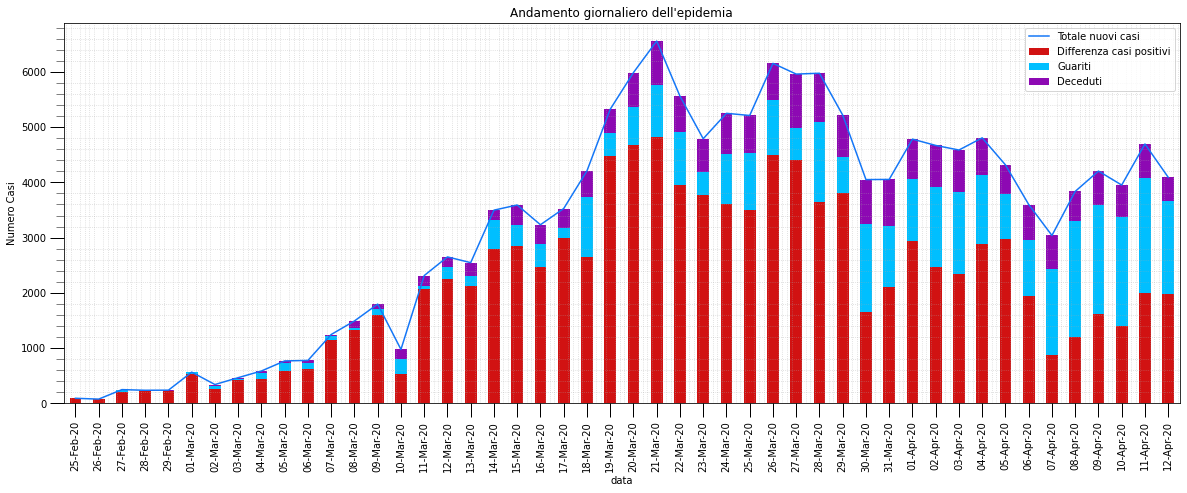

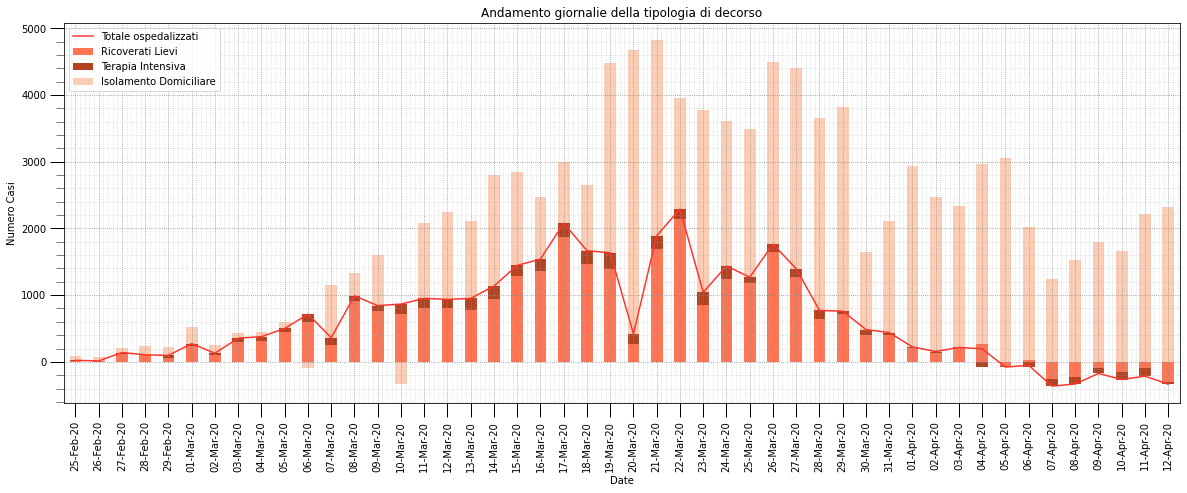

In [153]:
plot =['totale_casi']
legends = ["Totale nuovi casi"]
colors = [COL_TOTALE_CASI]
ax = incremental_data.plot(kind='line', x='data', y=plot, color=colors, rot=90, label=legends)
ax.set_ylabel('Numero Casi')
ax.set_title("Andamento giornaliero dell'epidemia")
beautify_graph(ax)

plot =['nuovi_attualmente_positivi','dimessi_guariti','deceduti']
legends = ["Differenza casi positivi","Guariti","Deceduti"]
colors = [COL_DIFF_POSITIVI, COL_GUARITI, COL_DECEDUTI]
ay = incremental_data.plot(kind='bar', x='data', y=plot, color=colors, rot=90, label=legends, stacked=True, ax=ax)

legends = ["Totale ospedalizzati"]
colors = [COL_TOT_RICOVERATI]
aw = incremental_data.plot(kind='line', x='data', y=['totale_ospedalizzati'], color=[COL_TOT_RICOVERATI], rot=90, label=legends)

plot =['ricoverati_con_sintomi', 'terapia_intensiva','isolamento_domiciliare',]
legends = ["Ricoverati Lievi","Terapia Intensiva","Isolamento Domiciliare"]
colors = [COL_RICOVERATI, COL_TERAPIA_INTENSIVA, COL_ISOLAMENTO_DOMICILIARE]
az = incremental_data.plot(kind='bar', x='data', y=plot, color=colors, rot=90, stacked=True, label=legends, ax=aw)
aw.set_title("Andamento giornalie della tipologia di decorso")
aw.set_ylabel('Numero Casi')
beautify_graph(aw)



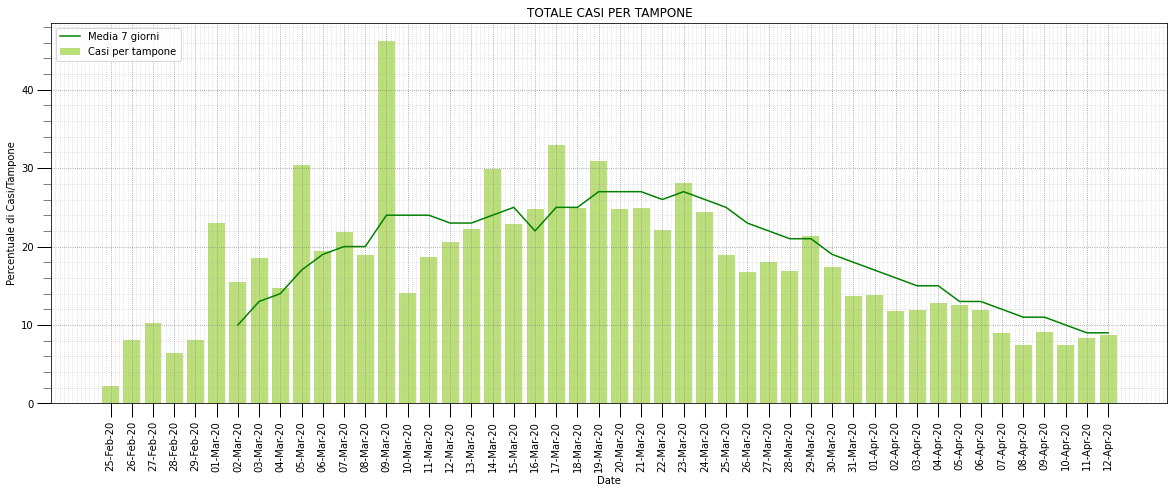

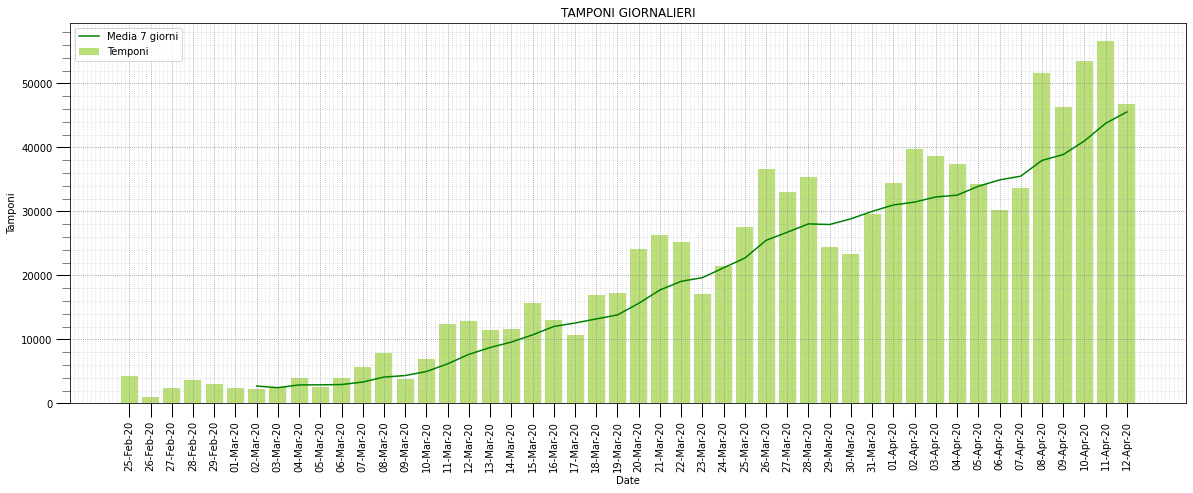

In [154]:
fig, ax = plt.subplots()

casi_tampone = incremental_data['totale_casi']/incremental_data['tamponi']

media_7_giorni =casi_tampone.rolling(7).mean().round(2)


plt.plot(incremental_data['data'], media_7_giorni*100, color=COL_AVG, label='Media 7 giorni')

ax.bar(incremental_data['data'], (incremental_data['totale_casi']/incremental_data['tamponi'])*100, label='Casi per tampone', color=COL_TAMPONI)

ax.set_xticklabels(incremental_data['data'], rotation=90)
ax.set_title("TOTALE CASI PER TAMPONE")
ax.set_ylabel('Percentuale di Casi/Tampone')
beautify_graph(ax)

fig, ax = plt.subplots()
tamponi = incremental_data['tamponi']

media_7_giorni =tamponi.rolling(7).mean().round(2)

plt.plot(incremental_data['data'], media_7_giorni, color=COL_AVG, label='Media 7 giorni')

ax.bar(incremental_data['data'], tamponi, label='Temponi', color=COL_TAMPONI)

ax.set_xticklabels(incremental_data['data'], rotation=90)
ax.set_title("TAMPONI GIORNALIERI")
ax.set_ylabel('Tamponi')
beautify_graph(ax)

#### I dati degli ultimi 5 giorni

In [155]:
show_table(incremental_data.rename(columns=NAME_LABELS),5).drop('TOT. POSITIVI', axis=1)

CASI TOTALI  DIFF. POSITIVI  GUARITI  DECEDUTI  TOT. RICOV.  \
                                                                         
08-Apr-20         3836            1195     2099       542         -332   
09-Apr-20         4204            1615     1979       610         -174   
10-Apr-20         3951            1396     1985       570         -265   
11-Apr-20         4694            1996     2079       619         -214   
12-Apr-20         4092            1984     1677       431         -335   

           RICOVERATI  TERAPIA INT.  ISOLAME. DOM.  TAMPONI  
                                                             
08-Apr-20        -233           -99           1527    51680  
09-Apr-20         -86           -88           1789    46244  
10-Apr-20        -157          -108           1661    53495  
11-Apr-20         -98          -116           2210    56609  
12-Apr-20        -297           -38           2319    46720

### Andamento Nazionale
I dati cumulati nei giorni. Ci da idea di come sta evolvendo l'epidemia.

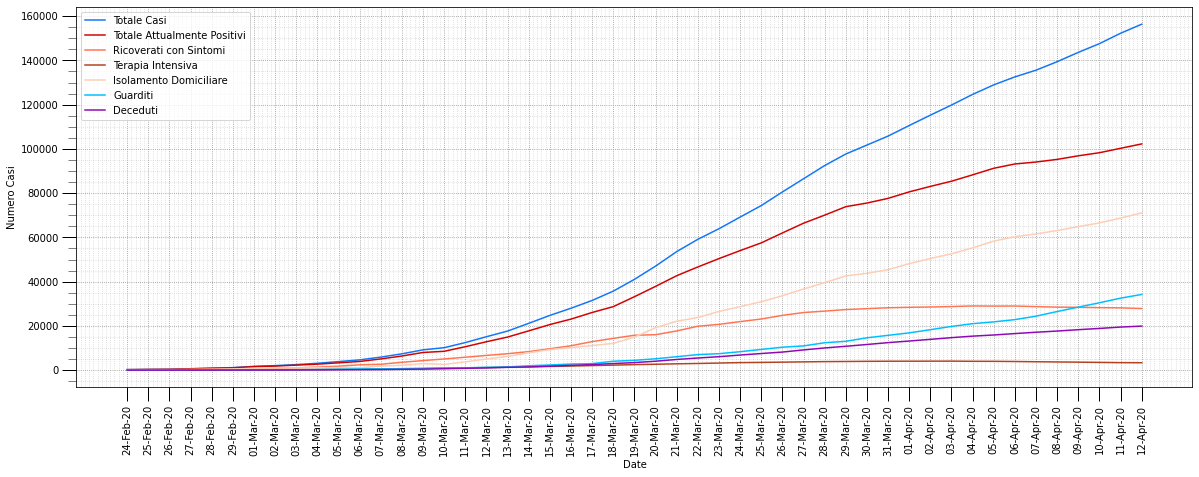

In [156]:
fig, ax = plt.subplots()

plot =['totale_casi','totale_attualmente_positivi','ricoverati_con_sintomi', 'terapia_intensiva','isolamento_domiciliare','dimessi_guariti','deceduti']
colors = [COL_TOTALE_CASI, COL_ATTUALMENTE_POSITIVI, COL_RICOVERATI, COL_TERAPIA_INTENSIVA, COL_ISOLAMENTO_DOMICILIARE, COL_GUARITI, COL_DECEDUTI]
legends = ["Totale Casi", "Totale Attualmente Positivi","Ricoverati con Sintomi","Terapia Intensiva","Isolamento Domiciliare","Guarditi", "Deceduti"]
for i in range(0,len(plot)):
    plt.plot(national_trend['data'], national_trend[plot[i]], color=colors[i], label=legends[i])

ax.set_xticklabels(national_trend['data'], rotation=90)
ax.set_ylabel('Numero Casi')

beautify_graph(ax)

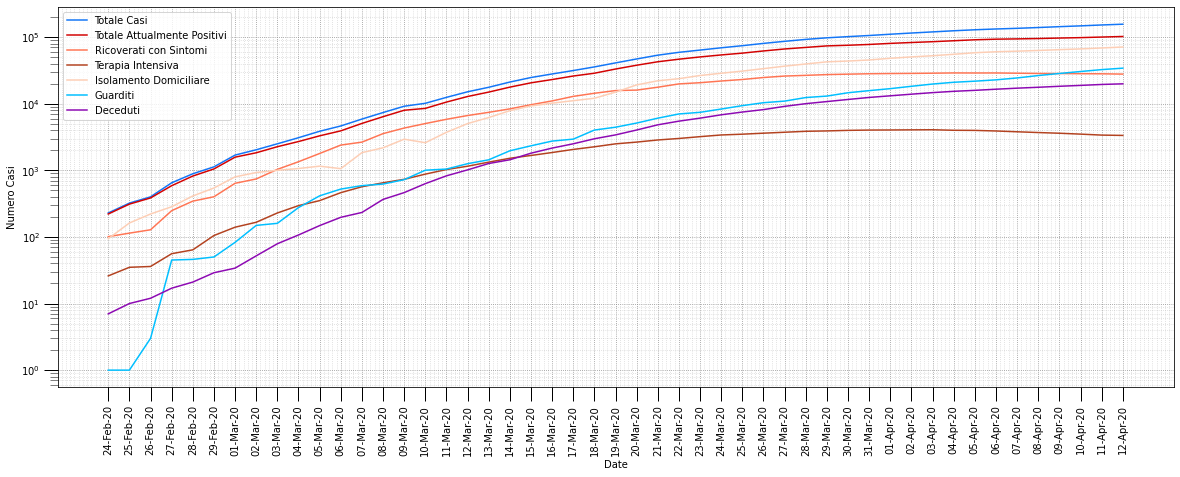

In [157]:

fig, ax = plt.subplots()
plt.yscale('log')
plot =['totale_casi','totale_attualmente_positivi','ricoverati_con_sintomi', 'terapia_intensiva','isolamento_domiciliare','dimessi_guariti','deceduti']
colors = [COL_TOTALE_CASI, COL_ATTUALMENTE_POSITIVI, COL_RICOVERATI, COL_TERAPIA_INTENSIVA, COL_ISOLAMENTO_DOMICILIARE, COL_GUARITI, COL_DECEDUTI]
legends = ["Totale Casi", "Totale Attualmente Positivi","Ricoverati con Sintomi","Terapia Intensiva","Isolamento Domiciliare","Guarditi", "Deceduti"]
for i in range(0,len(plot)):
    plt.plot(national_trend['data'], national_trend[plot[i]], color=colors[i], label=legends[i])

ax.set_xticklabels(national_trend['data'], rotation=90)
ax.set_ylabel('Numero Casi')

beautify_graph(ax)


#### I dati degli ultimi 5 giorni

In [21]:
show_table(national_trend.rename(columns = NAME_LABELS),5).drop('DIFF. POSITIVI', axis=1)

CASI TOTALI  TOT. POSITIVI  GUARITI  DECEDUTI  TOT. RICOV.  \
                                                                        
07-Apr-20       135586          94067    24392     17127        32510   
08-Apr-20       139422          95262    26491     17669        32178   
09-Apr-20       143626          96877    28470     18279        32004   
10-Apr-20       147577          98273    30455     18849        31739   
11-Apr-20       152271         100269    32534     19468        31525   

           RICOVERATI  TERAPIA INT.  ISOLAME. DOM.  TAMPONI  
                                                             
07-Apr-20       28718          3792          61557   755445  
08-Apr-20       28485          3693          63084   807125  
09-Apr-20       28399          3605          64873   853369  
10-Apr-20       28242          3497          66534   906864  
11-Apr-20       28144          3381          68744   963473

### Percentuale di crescita
Le percentuali di crescita sono valori che danno idea rispetto al giorno precedente di come si muove l'epidemia.
Questi valori a causa del numero molto elevato di contagi è normale che scendano.

In [51]:
growth_rates = pd.DataFrame()
growth_rates['data'] = national_trend['data']
growth_rates_columns = ['totale_casi','nuovi_attualmente_positivi', 'totale_attualmente_positivi', 'dimessi_guariti', 'deceduti', 'totale_ospedalizzati', 'ricoverati_con_sintomi', 'terapia_intensiva', 'isolamento_domiciliare',  'tamponi']

for c in growth_rates_columns:
    growth_rates[c] = (national_trend[c] - national_trend[c].shift(1))/national_trend[c].shift(1)*100
growth_rates= growth_rates.round(2)
growth_rates=growth_rates[1:]

In [52]:
show_table(growth_rates.rename(columns=NAME_LABELS),1)

CASI TOTALI  DIFF. POSITIVI  TOT. POSITIVI  GUARITI  DECEDUTI  \
                                                                           
11-Apr-20         3.18           42.98           2.03     6.83      3.28   

           TOT. RICOV.  RICOVERATI  TERAPIA INT.  ISOLAME. DOM.  TAMPONI  
                                                                          
11-Apr-20        -0.67       -0.35         -3.32           3.32     6.24

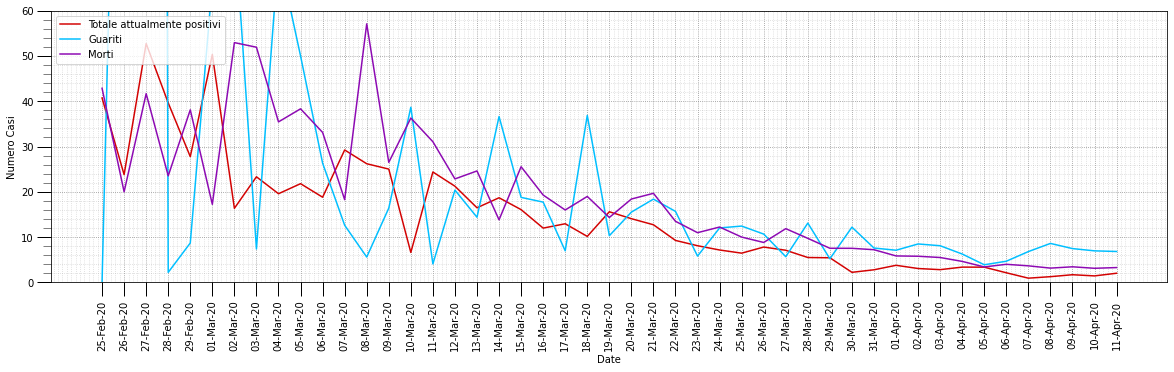

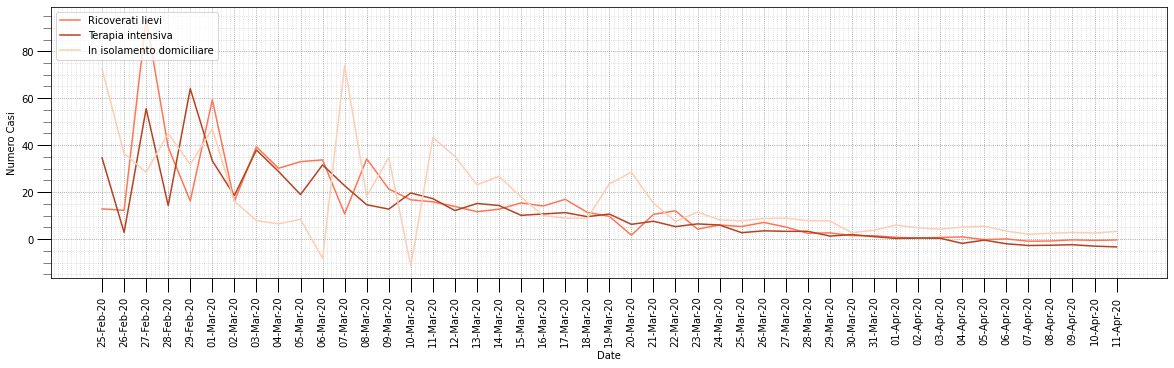

In [53]:
fig, ax = plt.subplots()

plot =['totale_attualmente_positivi', 'dimessi_guariti', 'deceduti', ]
labels = ['Totale attualmente positivi', 'Guariti', 'Morti', ]
colors = [COL_ATTUALMENTE_POSITIVI, COL_GUARITI, COL_DECEDUTI]
for i in range(0,len(plot)):
    plt.plot(growth_rates['data'], growth_rates[plot[i]], color=colors[i], label=labels[i])
ax.set_ylim(0,60)
ax.set_xticklabels(growth_rates['data'], rotation=90)
ax.set_ylabel('Numero Casi')

beautify_graph(ax)

fig, ax = plt.subplots()

plot =['ricoverati_con_sintomi', 'terapia_intensiva', 'isolamento_domiciliare']
labels = ['Ricoverati lievi', 'Terapia intensiva', 'In isolamento domiciliare']
colors = [COL_RICOVERATI, COL_TERAPIA_INTENSIVA, COL_ISOLAMENTO_DOMICILIARE]
for i in range(0,len(plot)):
    plt.plot(growth_rates['data'], growth_rates[plot[i]], color=colors[i], label=labels[i])
ay.set_ylim(-10,40)
ax.set_xticklabels(growth_rates['data'], rotation=90)
ax.set_ylabel('Numero Casi')

beautify_graph(ax)



#### I dati degli ultimi 5 giorni
I valori sono in percentuale (%)

In [25]:
show_table(growth_rates.rename(columns=NAME_LABELS),5)

CASI TOTALI  DIFF. POSITIVI  TOT. POSITIVI  GUARITI  DECEDUTI  \
                                                                           
07-Apr-20         2.29          -54.66           0.94     6.81      3.66   
08-Apr-20         2.83           35.80           1.27     8.61      3.16   
09-Apr-20         3.02           35.15           1.70     7.47      3.45   
10-Apr-20         2.75          -13.56           1.44     6.97      3.12   
11-Apr-20         3.18           42.98           2.03     6.83      3.28   

           TOT. RICOV.  RICOVERATI  TERAPIA INT.  ISOLAME. DOM.  TAMPONI  
                                                                          
07-Apr-20        -1.11       -0.89         -2.72           2.06     4.67  
08-Apr-20        -1.02       -0.81         -2.61           2.48     6.84  
09-Apr-20        -0.54       -0.30         -2.38           2.84     5.73  
10-Apr-20        -0.83       -0.55         -3.00           2.56     6.27  
11-Apr-20        -0.67       -0.35         -3.32           3.32     6.24

### Trends e medie
Uno spaccato di alcuni dati.
Viene visualizzato anche il trend medio settimanale.
GR = Growth Rate - Fattore di crescita

In [26]:
avg_trend = pd.DataFrame()
avg_trend['data'] = national_trend['data']

avg_trend['totale_casi'] = national_trend['totale_casi']
avg_trend['totale_casi_percent'] = growth_rates['totale_casi']
avg_trend['avg_totale'] = growth_rates['totale_casi'].rolling(7).mean().round(2)

avg_trend['attualmente_positivi'] = national_trend['totale_attualmente_positivi']
avg_trend['attualmente_positivi_percent'] = (avg_trend['attualmente_positivi'] - avg_trend['attualmente_positivi'].shift(1))/avg_trend['attualmente_positivi'].shift(1)*100
avg_trend['attualmente_positivi_percent']= avg_trend['attualmente_positivi_percent'].round(2)
avg_trend['avg_att_positivi'] = avg_trend['attualmente_positivi_percent'].rolling(7).mean().round(2)

avg_trend['dimessi_guariti'] = national_trend['dimessi_guariti']
avg_trend['dimessi_guariti_percent'] = growth_rates['dimessi_guariti']
avg_trend['avg_dimessi_guariti'] = growth_rates['dimessi_guariti'].rolling(7).mean().round(2)

avg_trend['deceduti'] = incremental_data['deceduti']
avg_trend['deceduti_percent'] = growth_rates['deceduti']
avg_trend['avg_deceduti'] = growth_rates['deceduti'].rolling(7).mean().round(2)

avg_trend['tamponi'] = incremental_data['tamponi']
avg_trend['tamponi_percent'] = growth_rates['tamponi']
avg_trend['avg_tamponi'] = growth_rates['tamponi'].rolling(7).mean().round(2)

* **CASI TOTALI GR**: Quando questo numero sarà zero, l'epidemia si sarà fermata e dovremmo aspettare che tutti siano guariti (Sperando che nessuno infetti altri).
* **NUOVI CASI TOTALI GR**: Quando questo numero sarà zero, non ci saranno più nuovi contagi e dovremo solo aspettare che tutti guardiscano
* **TAMPONI GR**: Più è alto questo numero più sono i tamponi che stanno effettuando rispetto al giorno prima. Non può andare in negativo. Se è 0 significa che non hanno fatto tamponi rispetto al giorno prima
* **DECEDUTI**: Questo numero indica di quanto aumentano rispetto al giorno prima i morti. Se questo numero va a zero significa che non ci sono più nuovi morti.

In [27]:
LABELS = {
    'nuovi_attualmente_positivi_casi': 'NUOVI CASI', 'nuovi_attualmente_positivi_percent': 'GR(%)', 'avg_nuovi': 'MEDIA 7GG (%)',
    'attualmente_positivi': 'TOT. ATTUALMENT. POS.',
    'attualmente_positivi_percent': 'GR(%)', 'avg_att_positivi': 'MEDIA 7GG (%)',
    'tamponi_percent': 'GR(%)', 'avg_tamponi': 'MEDIA 7GG (%)',
    'deceduti_percent': 'GR(%)', 'avg_deceduti':'MEDIA 7GG (%)',
    'totale_casi_percent': 'GR(%)', 'avg_totale':'MEDIA 7GG (%)',
    'dimessi_guariti_percent':'GR(%)', 'avg_dimessi_guariti':'MEDIA 7GG (%)',
}
show_table(avg_trend,5).rename(columns=LABELS)

CASI TOTALI  GR(%)  MEDIA 7GG (%)  TOT. ATTUALMENT. POS.  GR(%)  \
                                                                             
07-Apr-20       135586   2.29           3.61                  94067   0.94   
08-Apr-20       139422   2.83           3.37                  95262   1.27   
09-Apr-20       143626   3.02           3.20                  96877   1.70   
10-Apr-20       147577   2.75           3.02                  98273   1.44   
11-Apr-20       152271   3.18           2.90                 100269   2.03   

           MEDIA 7GG (%)  GUARITI  GR(%)  MEDIA 7GG (%)  DECEDUTI  GR(%)  \
                                                                           
07-Apr-20           2.78    24392   6.81           6.48       604   3.66   
08-Apr-20           2.43    26491   8.61           6.69       542   3.16   
09-Apr-20           2.23    28470   7.47           6.55       610   3.45   
10-Apr-20           2.03    30455   6.97           6.39       570   3.12   
11-Apr-20           1.84    32534   6.83           6.47       619   3.28   

           MEDIA 7GG (%)  TAMPONI  GR(%)  MEDIA 7GG (%)  
                                                         
07-Apr-20           4.69    33713   4.67           5.87  
08-Apr-20           4.31    51680   6.84           5.87  
09-Apr-20           3.98    46244   5.73           5.64  
10-Apr-20           3.64    53495   6.27           5.59  
11-Apr-20           3.44    56609   6.24           5.62

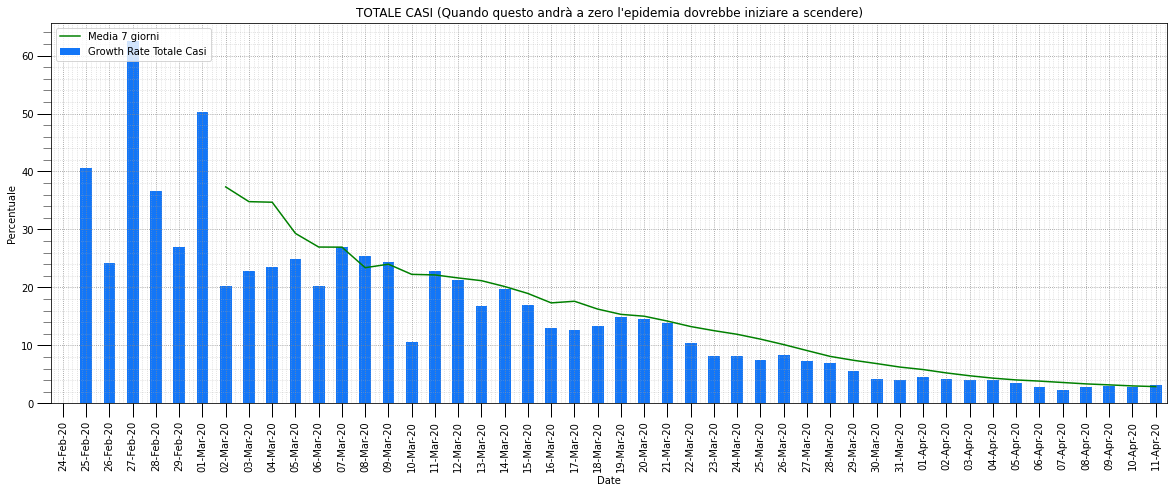

In [28]:
fig, ax = plt.subplots()
ay = avg_trend.plot(kind='line', x='data', y=['avg_totale'], color=[COL_AVG], rot=90, label=['Media 7 giorni'], ax=ax)
#plt.plot(inter[0], inter[1], color='tomato', label='Predizione') 
avg_trend.plot(kind='bar', x='data', y=['totale_casi_percent'], color=[COL_TOTALE_CASI], label=['Growth Rate Totale Casi'], ax=ay)

ax.set_title("TOTALE CASI (Quando questo andrà a zero l'epidemia dovrebbe iniziare a scendere)")
ax.set_ylabel('Percentuale')
beautify_graph(ax)

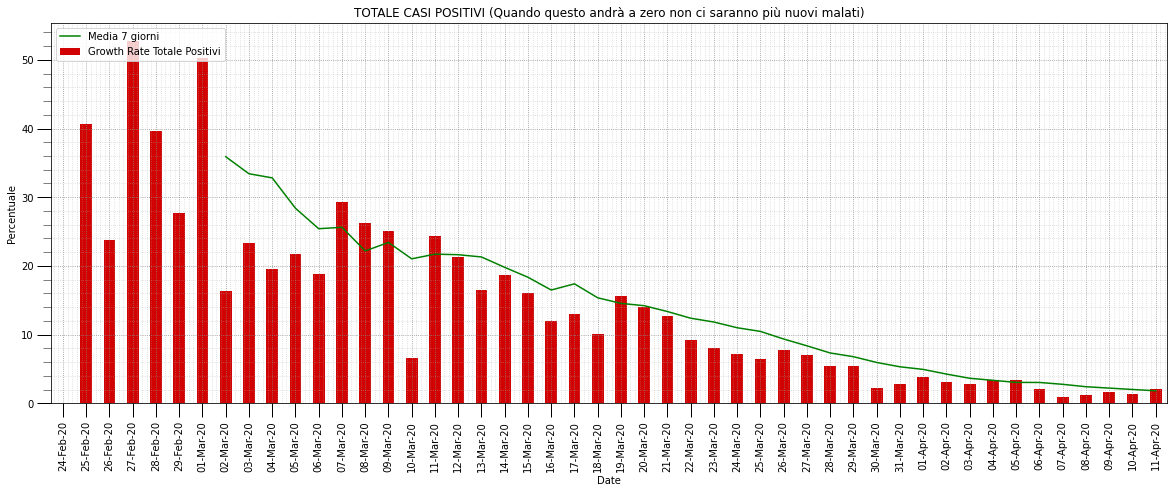

In [29]:
fig, ax = plt.subplots()

#ax.bar(x, series+fill, color=[COL_ATTUALMENTE_POSITIVI], label='Growth Rate Totale Positivi')
ay = avg_trend.plot(kind='line', x='data', y=['avg_att_positivi'], color=[COL_AVG], rot=90, label=['Media 7 giorni'], ax=ax)
#plt.plot(inter[0], inter[1], color='tomato', label='Predizione') 
avg_trend.plot(kind="bar", x='data', y=['attualmente_positivi_percent'], color=[COL_ATTUALMENTE_POSITIVI], label=['Growth Rate Totale Positivi'], ax=ay)

ax.set_title("TOTALE CASI POSITIVI (Quando questo andrà a zero non ci saranno più nuovi malati)")
ax.set_ylabel('Percentuale')

beautify_graph(ax)


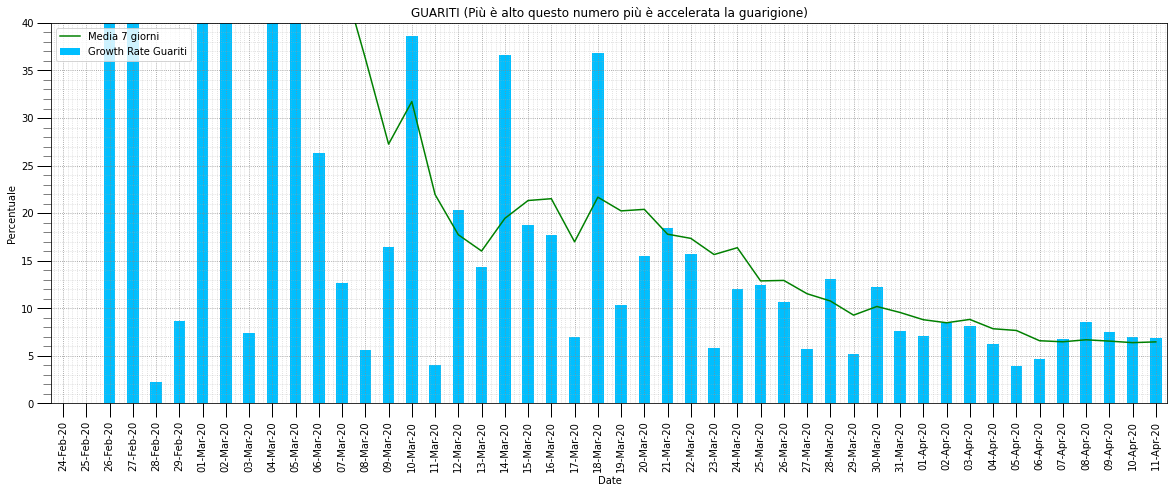

In [30]:
fig, ax = plt.subplots()
plot = ['dimessi_guariti_percent']

labels = ['Growth Rate Guariti']
ay = avg_trend.plot(kind='bar', x='data', y=plot, color=[COL_GUARITI], rot=90, label=labels, ax=ax)

plot = ['avg_dimessi_guariti']
labels = ['Media 7 giorni']
ay = avg_trend.plot(kind='line', x='data', y=plot, color=[COL_AVG], rot=90, label=labels, ax=ax)

ax.set_title("GUARITI (Più è alto questo numero più è accelerata la guarigione)")
ax.set_ylabel('Percentuale')
ax.set_ylim(0,40)
beautify_graph(ax)

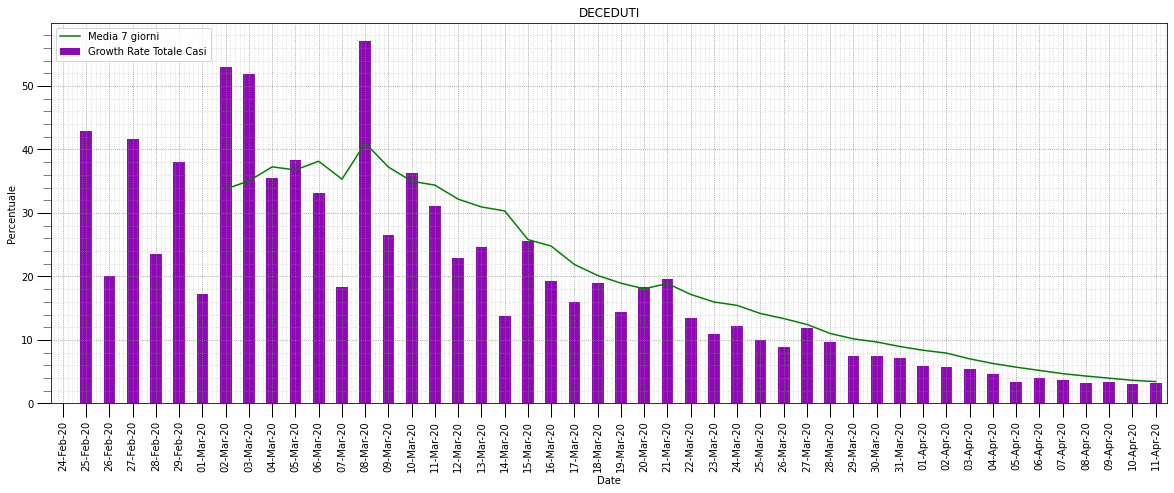

In [31]:
fig, ax = plt.subplots()

ay = avg_trend.plot(kind='line', x='data', y=['avg_deceduti'], color=[COL_AVG], rot=90, label=['Media 7 giorni'], ax=ax)
avg_trend.plot(kind='bar', x='data', y=['deceduti_percent'], color=[COL_DECEDUTI], label=['Growth Rate Totale Casi'], ax=ay)

ax.set_title("DECEDUTI")
ax.set_ylabel('Percentuale')
beautify_graph(ax)

## Velocità epidemia (Growth Factor)

Calcolo della derivata. La derivata ci dà l'idea della velocità e della direzione della curva epidemica. Se il valore è uguale a 0 la crescita è lineare (ogni giorno cresce dello stesso numero di persone è come andare a una velocità fissa di 50KM orari). Un fattore maggiore di uno indica che la crescita aumenta la sua velocità (l'epidemia schiaccia sull'acceleratore), un valore inferiore a uno indica l'epidemia rallenta la sua velocità (l'epidemaia ha schiacciato il freno). Una fattore uguale a zero significa che è stabile.

In [73]:
gf = pd.DataFrame()
gf['data'] = national_trend['data']
gf['totale_casi'] = national_trend['totale_casi']
gf['diff'] = gf['totale_casi'] - gf['totale_casi'].shift(1)
gf['gr'] = ((gf['diff'] / gf['diff'].shift(1))).round(3)
gf['avg_gf_3'] = gf['gr'].rolling(3).mean().round(3)
gf['avg_gf'] = gf['gr'].rolling(7).mean().round(3)

gf['totale_attualmente_positivi'] = national_trend['totale_attualmente_positivi']
gf['diff_att_pos'] = gf['totale_attualmente_positivi'] - gf['totale_attualmente_positivi'].shift(1)
gf['gr_att_pos'] = ((gf['diff_att_pos'] / gf['diff_att_pos'].shift(1))).round(3)
gf['avg_att_pos_3'] = gf['gr'].rolling(3).mean().round(3)
gf['avg_att_pos'] = gf['gr_att_pos'].rolling(7).mean().round(3)


show_table(gf, 5)\
    .drop('diff', axis=1)\
    .drop('diff_att_pos', axis=1)\
    .rename(columns=
       {'gr': 'GROWTH FACTOR', 
        'avg_gf': 'MEDIA 7GG',
        'avg_gf_3': 'MEDIA 3GG',
        'gr_att_pos': 'GROWTH FACTOR ATT. POS.',
        'avg_att_pos_3': 'MEDIA 3GG',
        'avg_att_pos': 'MEDIA 7GG',
        'gr_tamponi': 'GROWTH FACTOR TAMPONI',
        'avg_tamponi_3': 'MEDIA 3GG',
        'avg_tamponi': 'MEDIA 7GG'
       })


CASI TOTALI  GROWTH FACTOR  MEDIA 3GG  MEDIA 7GG  TOT. POSITIVI  \
                                                                             
07-Apr-20       135586          0.844      0.859      0.966          94067   
08-Apr-20       139422          1.262      0.980      0.978          95262   
09-Apr-20       143626          1.096      1.067      0.995          96877   
10-Apr-20       147577          0.940      1.099      0.989          98273   
11-Apr-20       152271          1.188      1.075      1.009         100269   

           GROWTH FACTOR ATT. POS.  MEDIA 3GG  MEDIA 7GG  
                                                          
07-Apr-20                    0.453      0.859      0.936  
08-Apr-20                    1.358      0.980      0.931  
09-Apr-20                    1.351      1.067      1.003  
10-Apr-20                    0.864      1.099      0.992  
11-Apr-20                    1.430      1.075      1.020

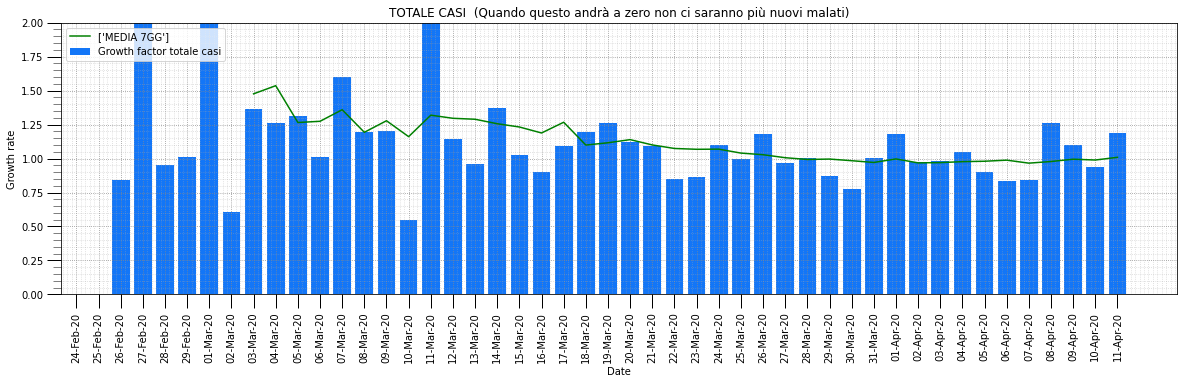

In [74]:
fig, ax = plt.subplots()

ax.bar(gf['data'], gf['gr'], label='Growth factor totale casi', color=COL_TOTALE_CASI)
ax.plot(gf['data'], gf['avg_gf'], color=COL_AVG, label=['MEDIA 7GG'])
ax.set_xticklabels(gf['data'], rotation=90)
ax.set_ylim(0,2)
ax.set_title("TOTALE CASI  (Quando questo andrà a zero non ci saranno più nuovi malati)")
ax.set_ylabel('Growth rate')
beautify_graph(ax)

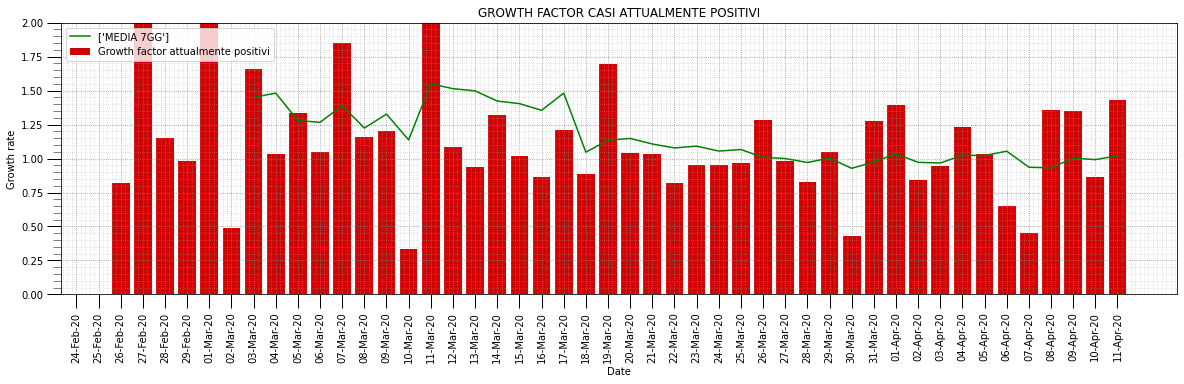

In [77]:
fig, ax = plt.subplots()

ax.bar(gf['data'], gf['gr_att_pos'], label='Growth factor attualmente positivi', color=COL_ATTUALMENTE_POSITIVI)
ax.plot(gf['data'], gf['avg_att_pos'], color=COL_AVG,label=['MEDIA 7GG'])
ax.set_xticklabels(gf['data'], rotation=90)
ax.set_ylim(0,2)
ax.set_title("GROWTH FACTOR CASI ATTUALMENTE POSITIVI")
ax.set_ylabel('Growth rate')
beautify_graph(ax)

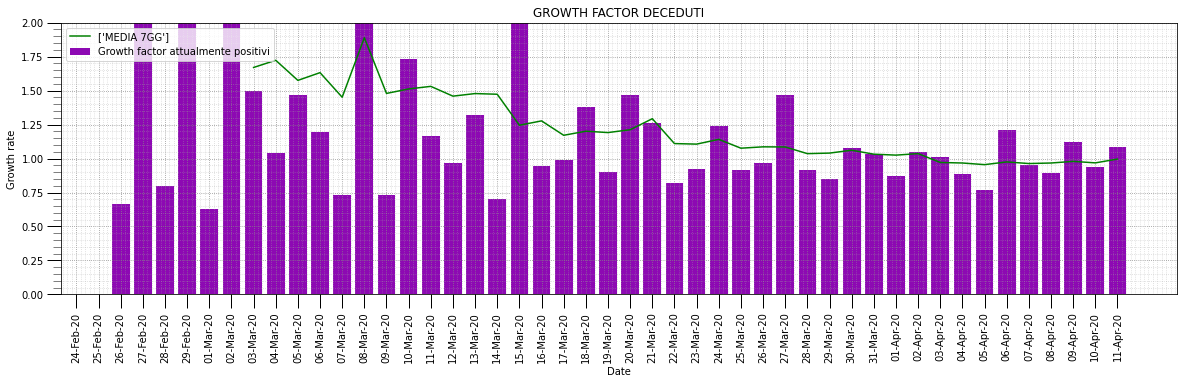

In [81]:
gf = pd.DataFrame()
gf['data'] = national_trend['data']
gf['deceduti'] = national_trend['deceduti']
gf['diff'] = gf['deceduti'] - gf['deceduti'].shift(1)
gf['gr'] = (gf['diff'] / gf['diff'].shift(1)).round(3)
gf['avg_gf'] = gf['gr'].rolling(7).mean().round(3)

fig, ax = plt.subplots()

ax.bar(gf['data'], gf['gr'], label='Growth factor attualmente positivi', color=COL_DECEDUTI)
ax.plot(gf['data'], gf['avg_gf'], color=COL_AVG,label=['MEDIA 7GG'])
ax.set_xticklabels(gf['data'], rotation=90)
ax.set_ylim(0,2)
ax.set_title("GROWTH FACTOR DECEDUTI")
ax.set_ylabel('Growth rate')
beautify_graph(ax)


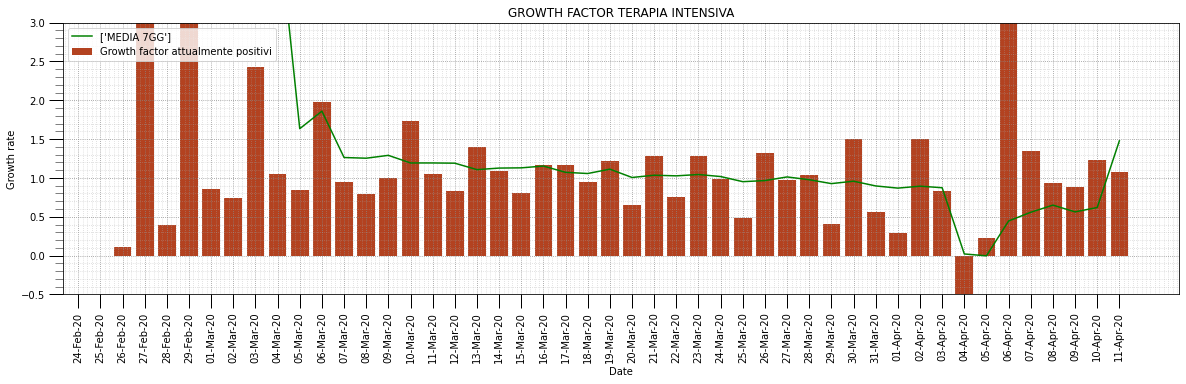

In [92]:
gf = pd.DataFrame()
gf['data'] = national_trend['data']
gf['terapia_intensiva'] = national_trend['terapia_intensiva']
gf['diff'] = gf['terapia_intensiva'] - gf['terapia_intensiva'].shift(1)
gf['gr'] = (gf['diff'] / gf['diff'].shift(1)).round(3)
gf['avg_gf'] = gf['gr'].rolling(7).mean().round(3)


fig, ax = plt.subplots()

ax.bar(gf['data'], gf['gr'], label='Growth factor attualmente positivi', color=COL_TERAPIA_INTENSIVA)
ax.plot(gf['data'], gf['avg_gf'], color=COL_AVG,label=['MEDIA 7GG'])
ax.set_xticklabels(gf['data'], rotation=90)
ax.set_ylim(-0.5,3)
ax.set_title("GROWTH FACTOR TERAPIA INTENSIVA")
ax.set_ylabel('Growth rate')
beautify_graph(ax)


### Divisione percentuali dei casi
Un indicazione percentuale dei dati. La fotografia ad oggi (dall'inizio dell'epidemia italiana)

**Le percentuali giornaliere (dati giorno per giorno)**

In [121]:
percents_in_period = pd.DataFrame()
percents_in_period['data'] = incremental_data['data']
percents_in_period['ricoverati_con_sintomi'] = (incremental_data['ricoverati_con_sintomi'] / incremental_data['totale_casi'])*100
percents_in_period['terapia_intensiva'] = (incremental_data['terapia_intensiva'] / incremental_data['totale_casi'])*100
percents_in_period['isolamento_domiciliare'] = (incremental_data['isolamento_domiciliare'] / incremental_data['totale_casi'])*100
percents_in_period['dimessi_guariti'] = (incremental_data['dimessi_guariti'] / incremental_data['totale_casi'])*100
percents_in_period['deceduti'] = (incremental_data['deceduti'] / incremental_data['totale_casi'])*100
percents_in_period['contagi'] = growth_rates['nuovi_attualmente_positivi']
percents_in_period = percents_in_period[1:].round(2)

In [122]:
percents_in_period.tail(5).drop('data', axis=1).drop('contagi', axis=1).rename(
    columns={
        'ricoverati_con_sintomi':'RICOVERATI',
        'terapia_intensiva':'TER. INTENSIVA',
        'isolamento_domiciliare':'ISOLAMENTO DOMICILIARE',
        'dimessi_guariti':'GUARITI',
        'deceduti':'DECEDUTI'
    }
)

RICOVERATI  TER. INTENSIVA  ISOLAMENTO DOMICILIARE  GUARITI  \
                                                                         
07-Apr-20       -8.49           -3.49                   40.93    51.17   
08-Apr-20       -6.07           -2.58                   39.81    54.72   
09-Apr-20       -2.05           -2.09                   42.55    47.07   
10-Apr-20       -3.97           -2.73                   42.04    50.24   
11-Apr-20       -2.09           -2.47                   47.08    44.29   

           DECEDUTI  
                     
07-Apr-20     19.87  
08-Apr-20     14.13  
09-Apr-20     14.51  
10-Apr-20     14.43  
11-Apr-20     13.19

**Nuove Percentuali dell'ultimo giorno non tiene conto dei valori negativi**

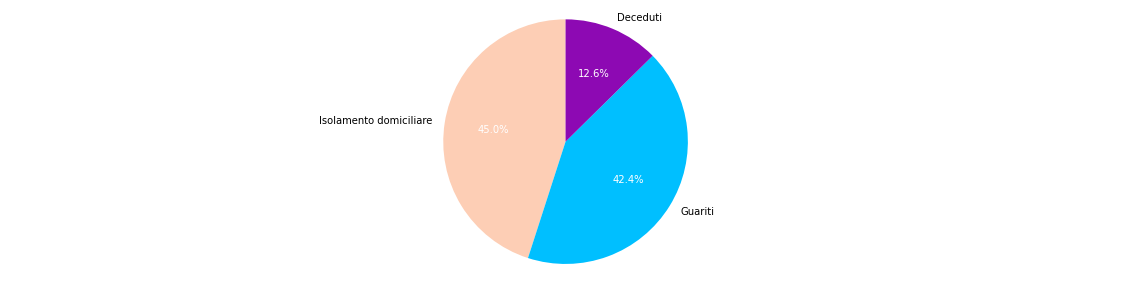

In [123]:
# Data to plot
last_info = incremental_data[-1:]
v1 = int(last_info['ricoverati_con_sintomi'])
v2 = int(last_info['terapia_intensiva'])
v3 = int(last_info['isolamento_domiciliare'])
v4 = int(last_info['dimessi_guariti'])
v5 = int(last_info['deceduti'])

all_colors = [COL_RICOVERATI, COL_TERAPIA_INTENSIVA, COL_ISOLAMENTO_DOMICILIARE, COL_GUARITI, COL_DECEDUTI]
all_labels = 'Ricoverati con sintomi', 'Terapia Intensiva', 'Isolamento domiciliare', 'Guariti', 'Deceduti'
values = [v1, v2, v3, v4, v5]

colors = []
labels = []
sizes = []

for i in range(len(all_labels)):
    if values[i]>0:
        sizes.append(values[i])
        labels.append(all_labels[i])
        colors.append(all_colors[i])
        
fig1, ax1 = plt.subplots()
_, _, autotexts = ax1.pie(sizes,labels=labels,colors=colors, autopct='%1.1f%%',  startangle=90)

for autotext in autotexts:
    autotext.set_color('white')
    
ax1.axis('equal')
plt.show()


In [126]:
percents_in_period.tail(5)

data  ricoverati_con_sintomi  terapia_intensiva  \
                                                                  
07-Apr-20  07-Apr-20                   -8.49              -3.49   
08-Apr-20  08-Apr-20                   -6.07              -2.58   
09-Apr-20  09-Apr-20                   -2.05              -2.09   
10-Apr-20  10-Apr-20                   -3.97              -2.73   
11-Apr-20  11-Apr-20                   -2.09              -2.47   

           isolamento_domiciliare  dimessi_guariti  deceduti  contagi  
                                                                       
07-Apr-20                   40.93            51.17     19.87   -54.66  
08-Apr-20                   39.81            54.72     14.13    35.80  
09-Apr-20                   42.55            47.07     14.51    35.15  
10-Apr-20                   42.04            50.24     14.43   -13.56  
11-Apr-20                   47.08            44.29     13.19    42.98

In [132]:
a="""plt.rcParams['figure.figsize'] = [20, 5]
fig, ax = plt.subplots()

plot = ['isolamento_domiciliare','dimessi_guariti','deceduti','ricoverati_con_sintomi','terapia_intensiva']
colors = [COL_ISOLAMENTO_DOMICILIARE, COL_GUARITI, COL_DECEDUTI,COL_RICOVERATI, COL_TERAPIA_INTENSIVA ]
labels = ['Isolamento Domiciliare','Guariti','Deceduti','Ricoverati con sintomi','Terapia Intensiva']

for i in range(len(plot)):
    plt.bar(percents_in_period['data'], percents_in_period[plot[i]], color=colors[i],label=labels[i])

ax.set_ylim(-20,100)
ax.set_xticklabels(gf['data'], rotation=90)
ax.set_title("PERCENTUALE GIORNALIERA")
ax.set_ylabel('Percentuale')
beautify_graph(ax)
"""

**Le percentuali dall'inizio dell'epidemia**

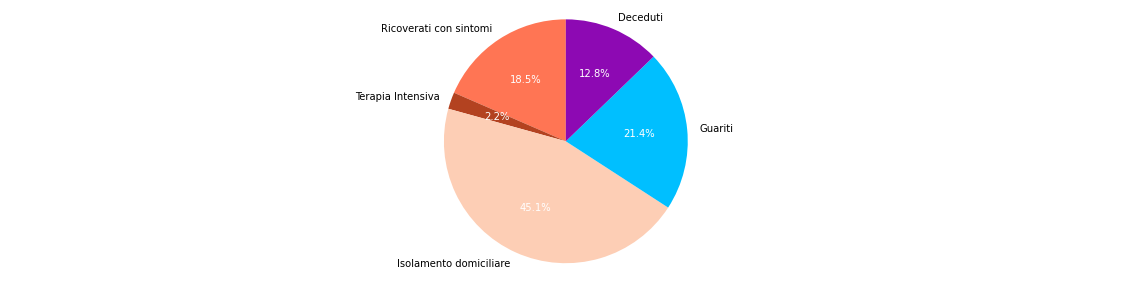

In [133]:
# Data to plot
last_info = national_trend[-1:]
v1 = int(last_info['ricoverati_con_sintomi'])
v2 = int(last_info['terapia_intensiva'])
v3 = int(last_info['isolamento_domiciliare'])
v4 = int(last_info['dimessi_guariti'])
v5 = int(last_info['deceduti'])
labels = 'Ricoverati con sintomi', 'Terapia Intensiva', 'Isolamento domiciliare', 'Guariti', 'Deceduti'
sizes = [v1, v2, v3, v4, v5]
fig1, ax1 = plt.subplots()
colors = [COL_RICOVERATI, COL_TERAPIA_INTENSIVA, COL_ISOLAMENTO_DOMICILIARE, COL_GUARITI, COL_DECEDUTI]
_, _, autotexts = ax1.pie(sizes,labels=labels,colors=colors, autopct='%1.1f%%',  startangle=90)

for autotext in autotexts:
    autotext.set_color('white')
    
ax1.axis('equal')

plt.show()


In [134]:
percents_in_period = pd.DataFrame()
percents_in_period['data'] = national_trend['data']
percents_in_period['ricoverati_con_sintomi'] = (national_trend['ricoverati_con_sintomi'] / national_trend['totale_casi'])*100
percents_in_period['terapia_intensiva'] = (national_trend['terapia_intensiva'] / national_trend['totale_casi'])*100
percents_in_period['isolamento_domiciliare'] = (national_trend['isolamento_domiciliare'] / national_trend['totale_casi'])*100
percents_in_period['dimessi_guariti'] = (national_trend['dimessi_guariti'] / national_trend['totale_casi'])*100
percents_in_period['deceduti'] = (national_trend['deceduti'] / national_trend['totale_casi'])*100
percents_in_period['contagi'] = growth_rates['nuovi_attualmente_positivi']
percents_in_period = percents_in_period[1:].round(2)

Lo spaccato giorno per giorno percentuale. Da qui si evidenzia come si evolve l'andamento percencentuale dell'epidemia. In basso (in verde) il grafico del Growth Rate di ogni giorno rispetto al giorno precedente. Per capire come si evolvono le percentuali in base all'aumento o la diminuzione dei nuovi casi.

In [135]:
percents_in_period.tail(5).drop('data', axis=1).drop('contagi', axis=1).rename(
    columns={
        'ricoverati_con_sintomi':'RICOVERATI',
        'terapia_intensiva':'TER. INTENSIVA',
        'isolamento_domiciliare':'ISOLAMENTO DOMICILIARE',
        'dimessi_guariti':'GUARITI',
        'deceduti':'DECEDUTI'
    }
)

RICOVERATI  TER. INTENSIVA  ISOLAMENTO DOMICILIARE  GUARITI  \
                                                                         
07-Apr-20       21.18            2.80                   45.40    17.99   
08-Apr-20       20.43            2.65                   45.25    19.00   
09-Apr-20       19.77            2.51                   45.17    19.82   
10-Apr-20       19.14            2.37                   45.08    20.64   
11-Apr-20       18.48            2.22                   45.15    21.37   

           DECEDUTI  
                     
07-Apr-20     12.63  
08-Apr-20     12.67  
09-Apr-20     12.73  
10-Apr-20     12.77  
11-Apr-20     12.79

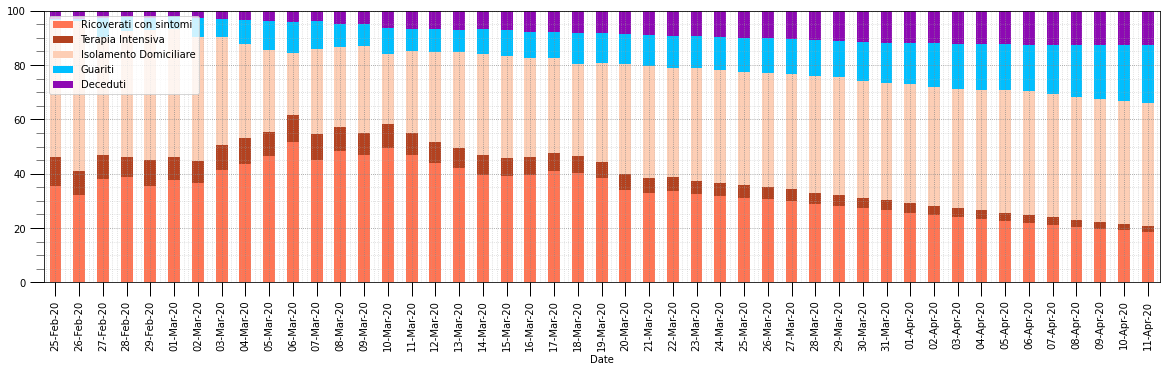

In [136]:
# %matplotlib notebook
plt.rcParams['figure.figsize'] = [20, 5]

plot = ['ricoverati_con_sintomi','terapia_intensiva','isolamento_domiciliare','dimessi_guariti','deceduti']
colors = [COL_RICOVERATI, COL_TERAPIA_INTENSIVA, COL_ISOLAMENTO_DOMICILIARE, COL_GUARITI, COL_DECEDUTI]
labels = ['Ricoverati con sintomi','Terapia Intensiva','Isolamento Domiciliare','Guariti','Deceduti']
ax = percents_in_period.plot(kind='bar', x='data', y=plot, color=colors, rot=90, label=labels, stacked=True)
ax.set_ylim(0,100)

beautify_graph(ax)


## DATI REGIONALI

In [325]:
regional_trend_read = pd.read_csv(os.path.join(REPO_DIR,'dati-regioni/dpc-covid19-ita-regioni.csv'))
regional_trend_read['totale_attualmente_positivi'] = regional_trend_read['totale_positivi']
regional_trend_read['nuovi_attualmente_positivi'] = regional_trend_read['variazione_totale_positivi']
regional_trend_read['DATA'] = pd.to_datetime(regional_trend_read['data']).dt.strftime('%d-%b-%y')
regional_trend_read['data'] = pd.to_datetime(regional_trend_read['data']).dt.strftime('%d-%b-%y')



In [326]:
#regional_trend.set_index(keys=['DATA'], append=False, inplace=True)
#regional_trend.index.rename('', inplace=True)


regions = regional_trend_read.denominazione_regione.unique()
regions_data = {}

for r in regions:
    data = regional_trend_read[regional_trend_read['denominazione_regione']==r]
    data.set_index(keys=['data'], append=False, inplace=True)
    regions_data[r]=data


In [327]:
#media_7_giorni =casi_tampone.rolling(7).mean().round(2)
region_colors = ['#505cf7','#e688b5','#e688b5','#791d9f','#17652e','#76f384',\
          '#bd3089','#5c4566','#3b6712','#bb90bf','#549bb5','#a674cc',\
          '#345a48','#dc9615','#51294a','#0446ca','#96bf9b','#c20cb2',\
          '#acc7fb','#ecdab7','#bbfc5f'
         ]


In [328]:
plot =['totale_casi','totale_attualmente_positivi','ricoverati_con_sintomi', 'terapia_intensiva','isolamento_domiciliare','dimessi_guariti','deceduti']

regional_datas = {x:pd.DataFrame() for x in plot}

for p in plot:
    for i,r in enumerate(regions):
        regional_datas[p][r]= regions_data[r][p]



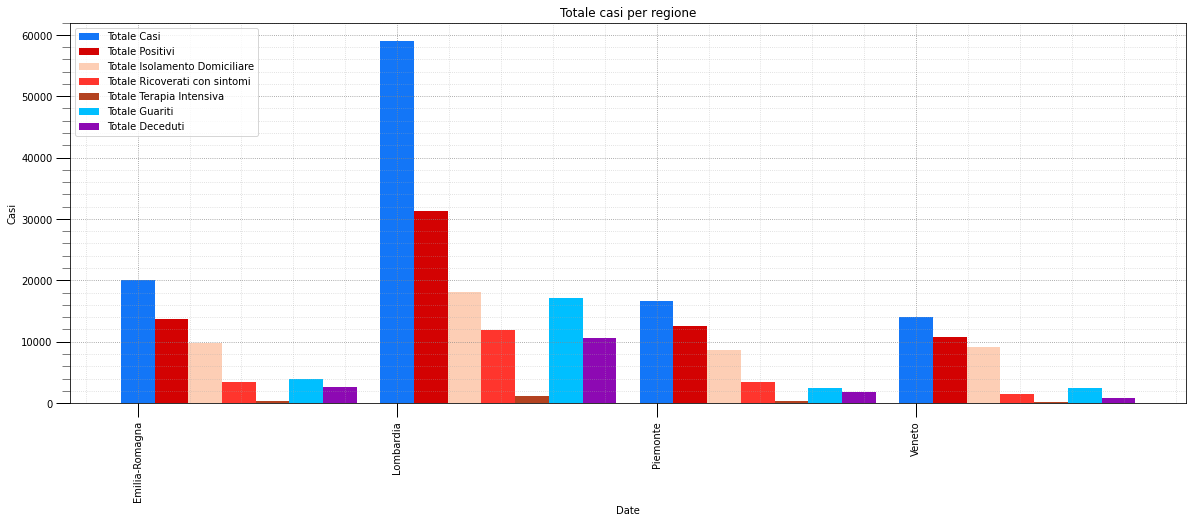

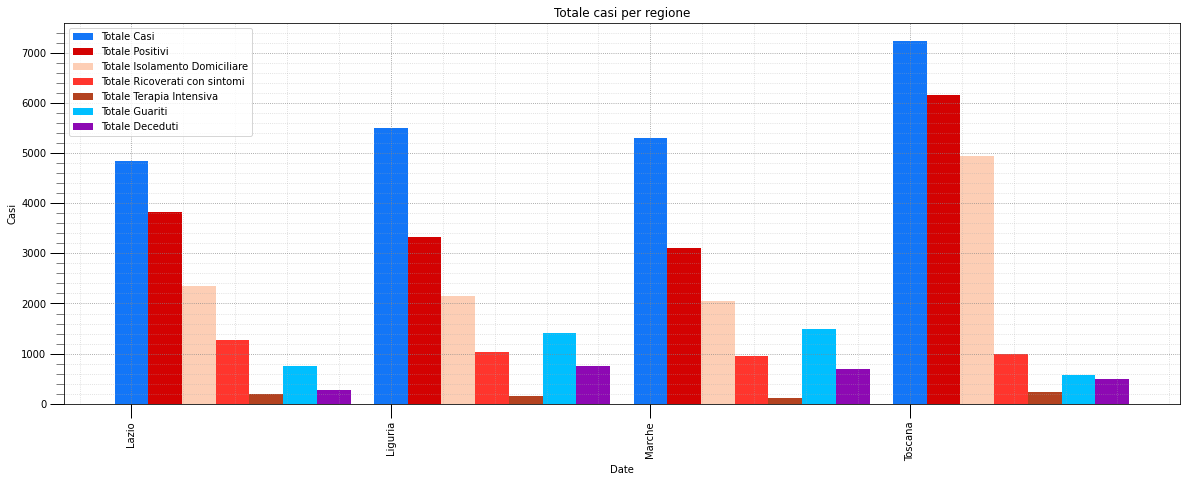

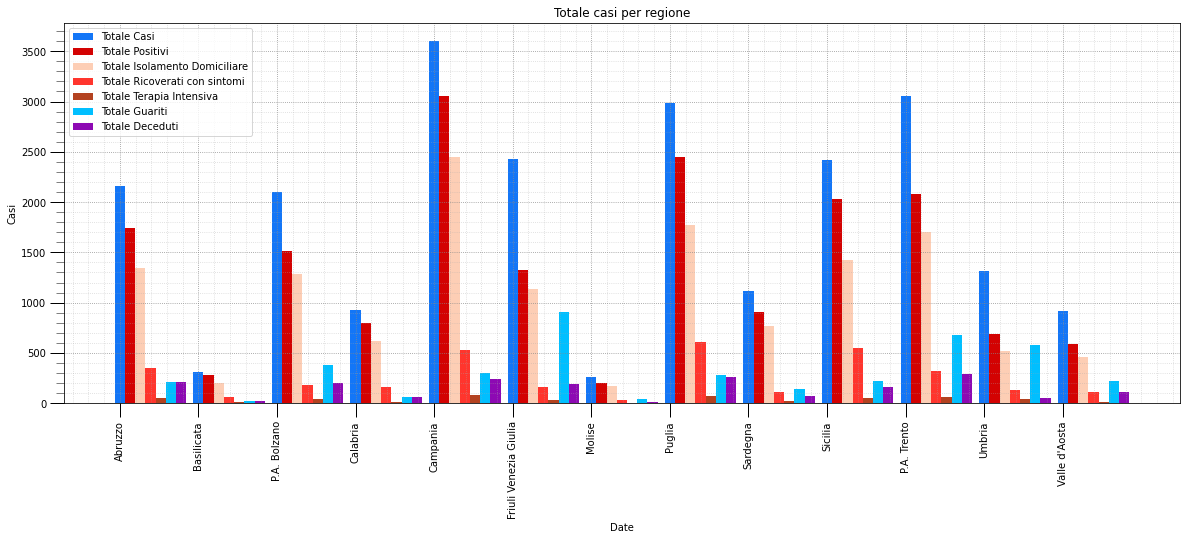

In [378]:
COL_TAMPONI= '#bce079'

high_level_regions = ['Lombardia','Veneto','Emilia-Romagna','Piemonte']

mid_level_regions = ['Toscana','Lazio','Liguria','Marche']

def high_level(df):
    d = df.copy()
    for c in df.columns:
        if c not in high_level_regions:
            d = d.drop(c, axis=1)
    return d

def mid_level(df):
    d = df.copy()
    for c in df.columns:
        if c not in mid_level_regions:
            d = d.drop(c, axis=1)
    return d

def low_level(df):
    d = df.copy()
    for c in high_level_regions + mid_level_regions:
        d = d.drop(c, axis=1)
    return d


levels= [high_level, mid_level, low_level]

for l in levels:
    fig, ax = plt.subplots()

    w=0.13

    d = l(regional_datas['totale_casi'])[-1:]

    x_label=[x for x in d.columns]
    x=np.arange(len(x_label))

    d = l(regional_datas['totale_casi'])[-1:]
    y=d.values[0]
    plt.bar(x_label, y, width=w,color=COL_TOTALE_CASI, label='Totale Casi')

    d = l(regional_datas['totale_attualmente_positivi'])[-1:]
    y=d.values[0]
    plt.bar(x+w, y, width=w, color=COL_ATTUALMENTE_POSITIVI, label='Totale Positivi')

    d = l(regional_datas['isolamento_domiciliare'])[-1:]
    y=d.values[0]
    plt.bar(x+2*w, y, width=w, color=COL_ISOLAMENTO_DOMICILIARE, label='Totale Isolamento Domiciliare')

    d = l(regional_datas['ricoverati_con_sintomi'])[-1:]
    y=d.values[0]
    plt.bar(x+3*w, y, width=w, color=COL_TOT_RICOVERATI, label='Totale Ricoverati con sintomi')

    d = l(regional_datas['terapia_intensiva'])[-1:]
    y=d.values[0]
    plt.bar(x+4*w, y, width=w, color=COL_TERAPIA_INTENSIVA, label='Totale Terapia Intensiva')

    d = l(regional_datas['dimessi_guariti'])[-1:]
    y=d.values[0]
    plt.bar(x+5*w, y, width=w, color=COL_GUARITI, label='Totale Guariti')

    d = l(regional_datas['deceduti'])[-1:]
    y=d.values[0]
    plt.bar(x+6*w, y, width=w, color=COL_DECEDUTI, label='Totale Deceduti')


    ax.set_title("Totale casi per regione")
    ax.set_ylabel('Casi')
    ax.set_xticklabels(x_label, rotation=90)
    beautify_graph(ax)


## Andamento per 

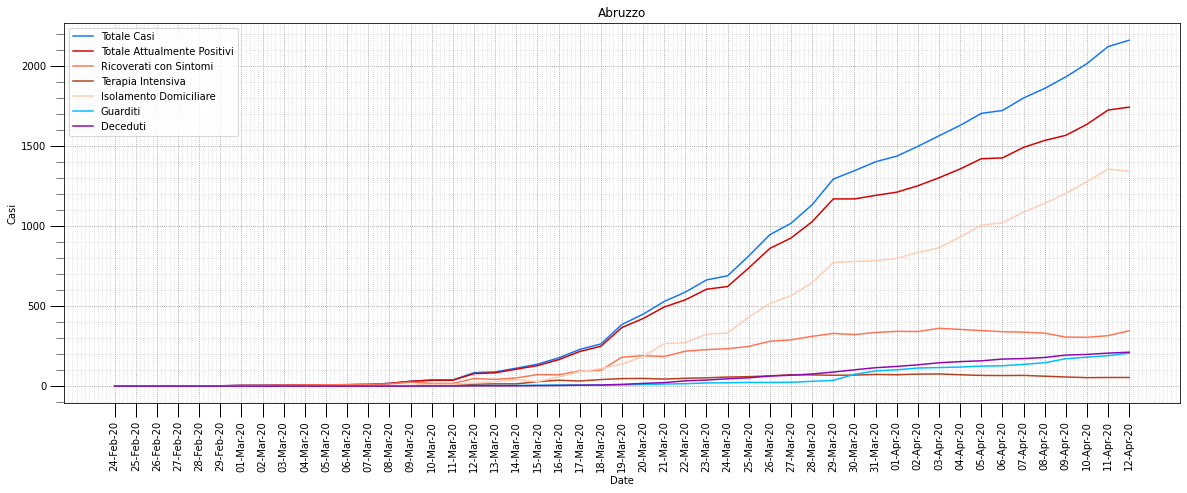

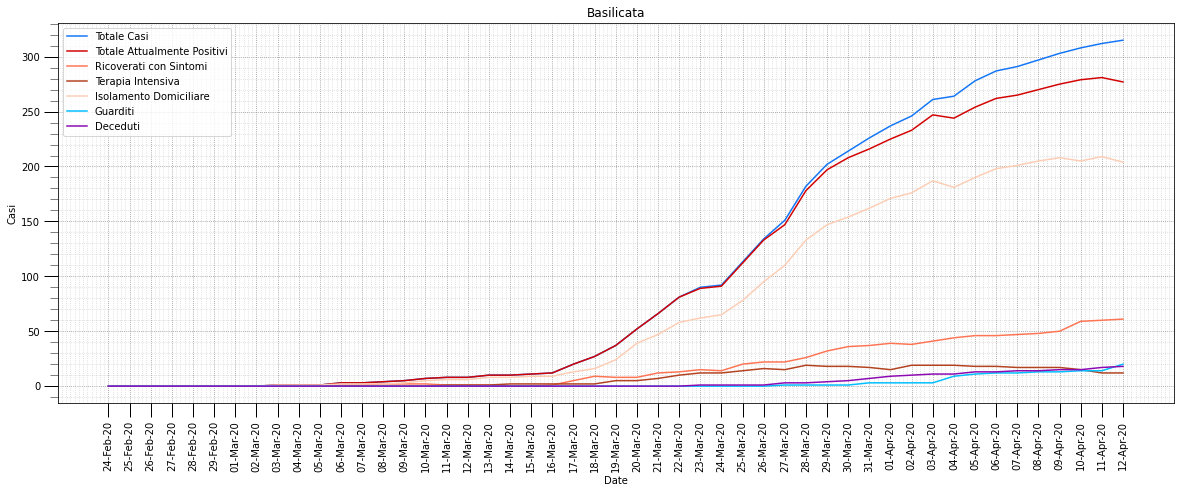

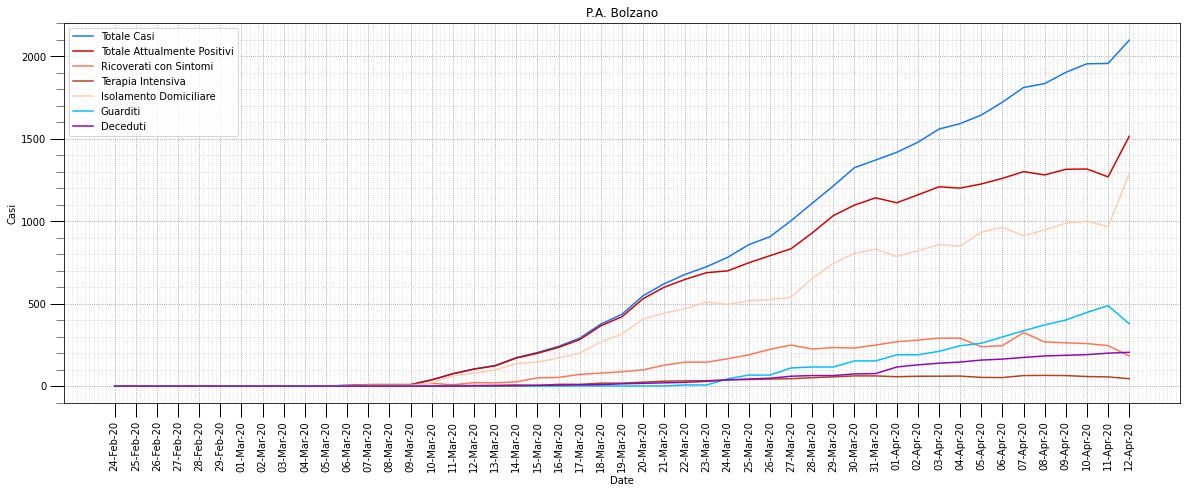

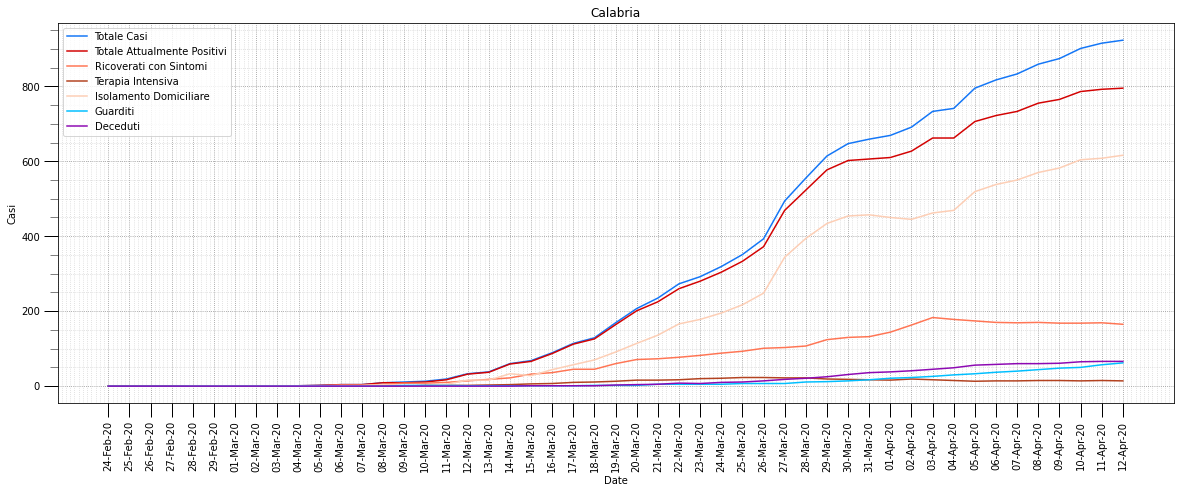

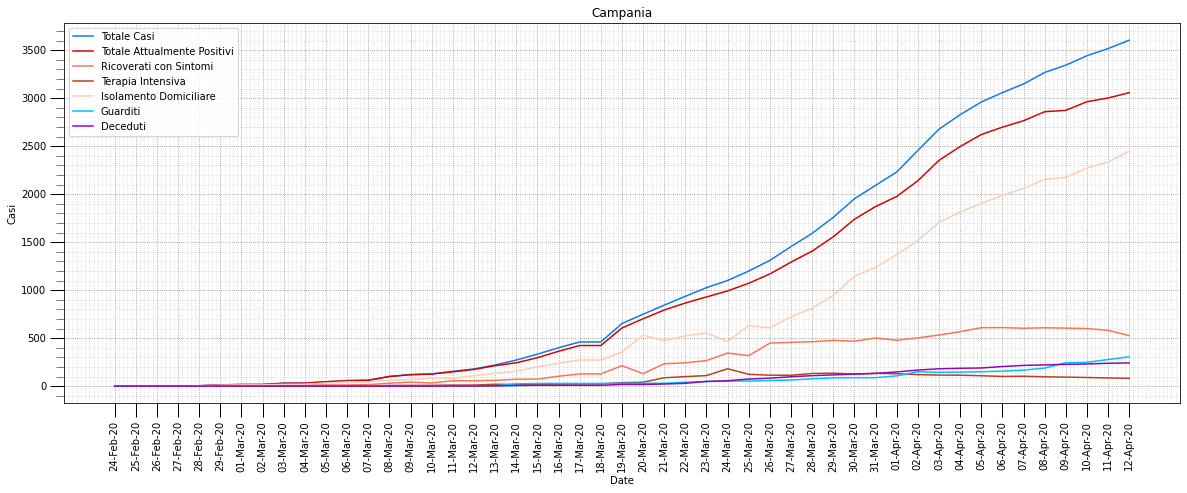

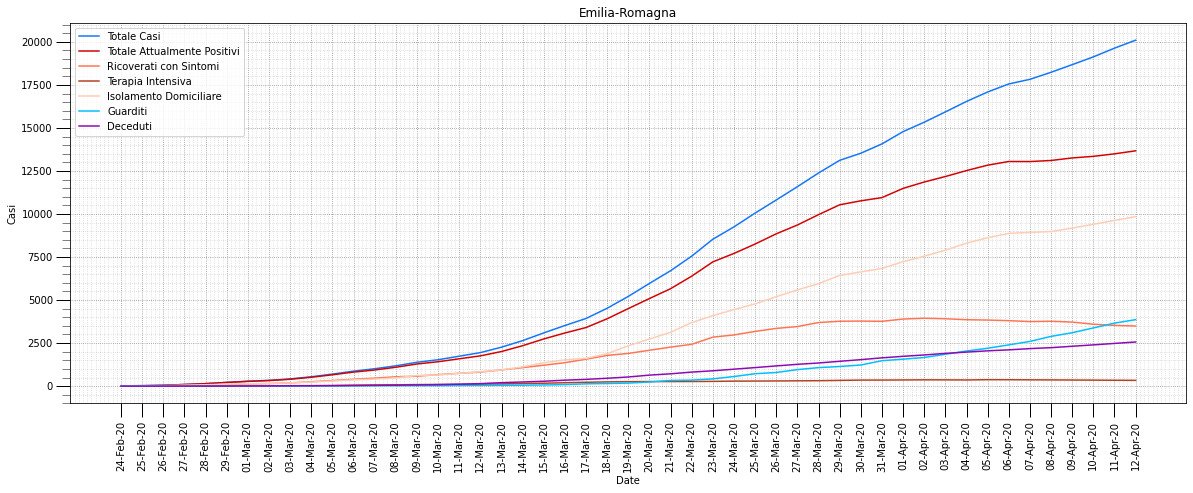

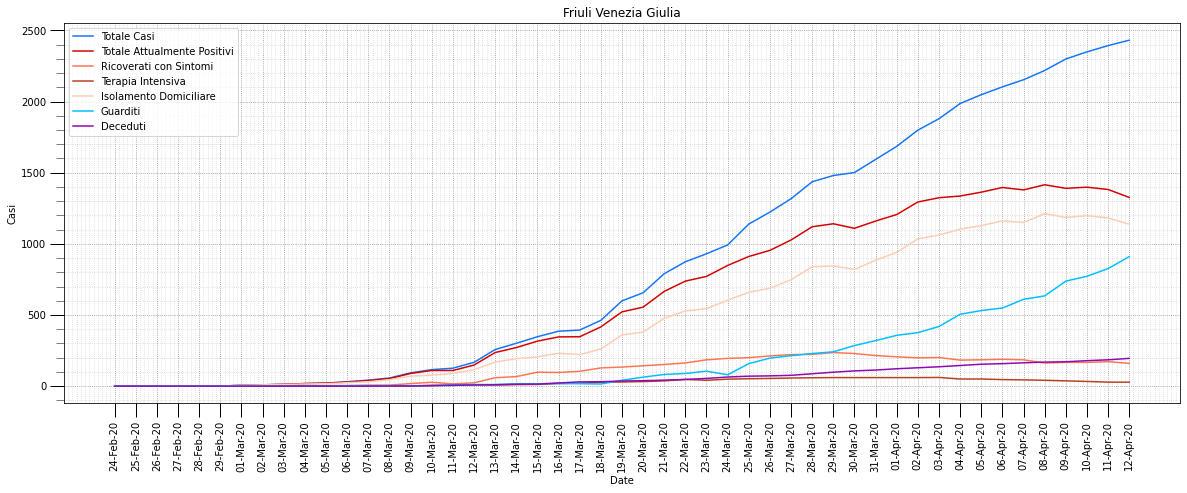

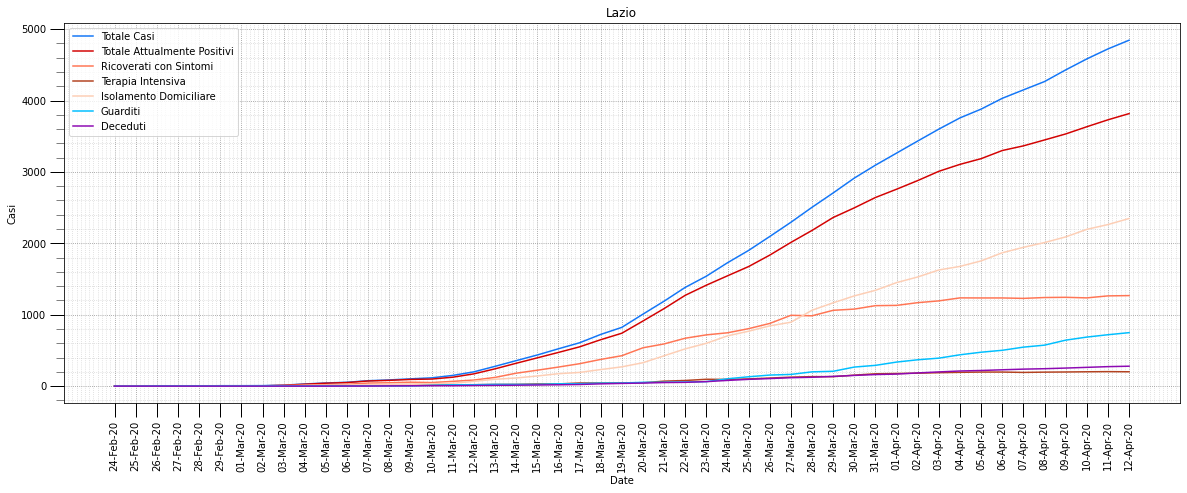

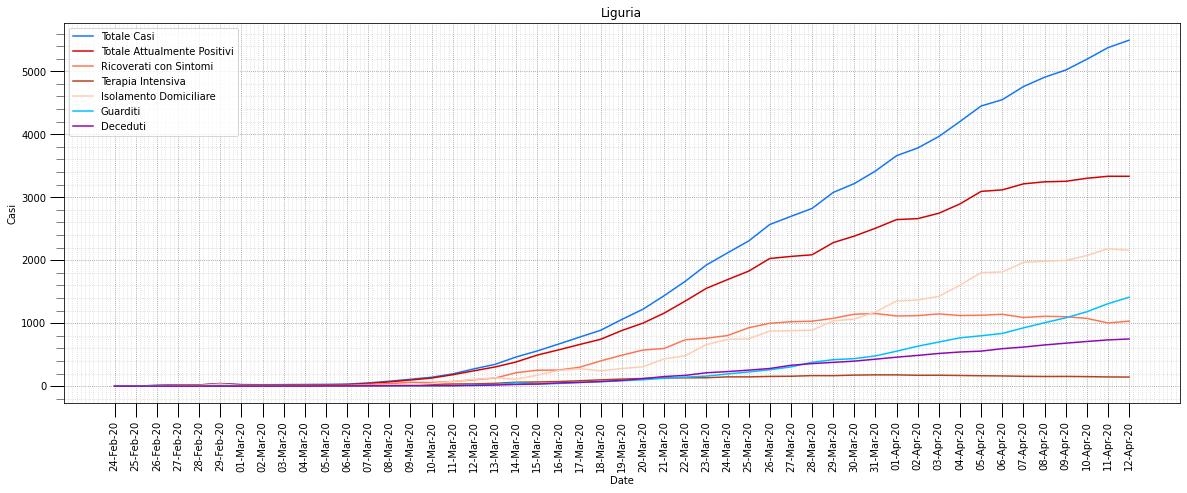

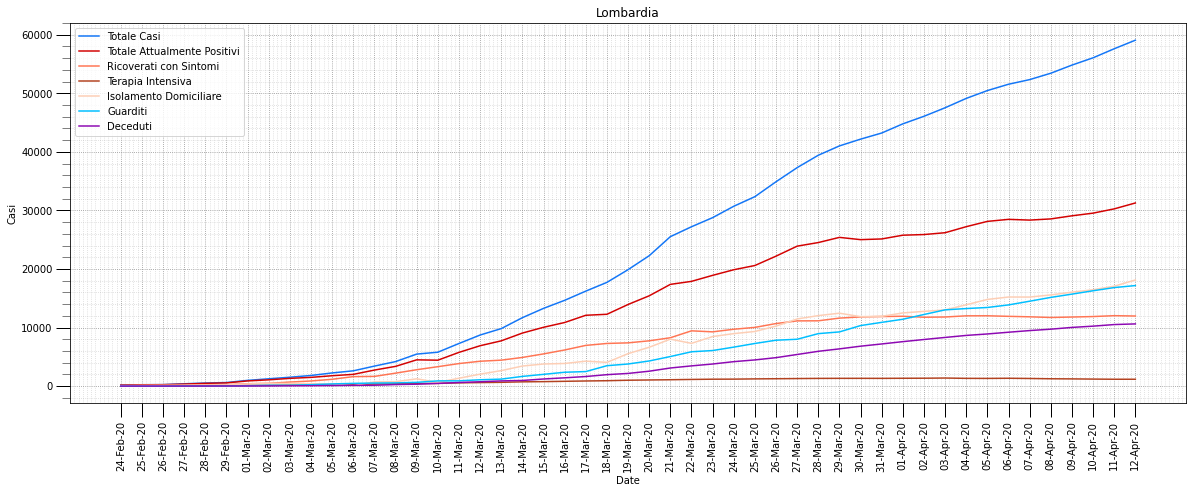

In [239]:

plot =['totale_casi','totale_attualmente_positivi','ricoverati_con_sintomi', 'terapia_intensiva','isolamento_domiciliare','dimessi_guariti','deceduti']
colors = [COL_TOTALE_CASI, COL_ATTUALMENTE_POSITIVI, COL_RICOVERATI, COL_TERAPIA_INTENSIVA, COL_ISOLAMENTO_DOMICILIARE, COL_GUARITI, COL_DECEDUTI]
legends = ["Totale Casi", "Totale Attualmente Positivi","Ricoverati con Sintomi","Terapia Intensiva","Isolamento Domiciliare","Guarditi", "Deceduti"]
for i,r in enumerate(regions[:10]):
    fig, ax = plt.subplots()
    for j,p in enumerate(plot):
        plt.plot(regions_data[r]['data'], regions_data[r][p], color=colors[j], label=legends[j])
    ax.set_title(r)
    ax.set_ylabel('Casi')
    ax.set_xticklabels(regions_data[r]['data'], rotation=90)    
    beautify_graph(ax)

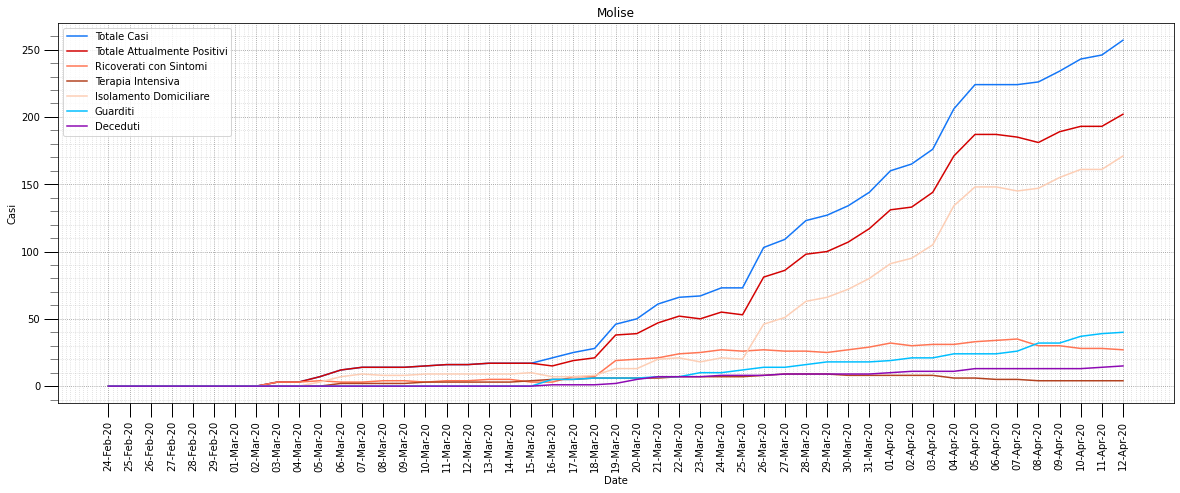

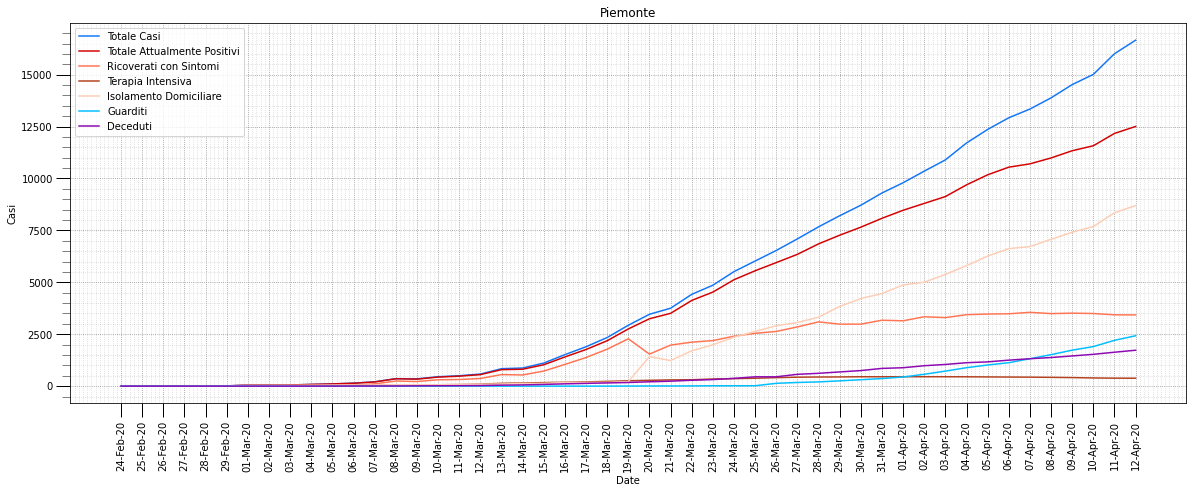

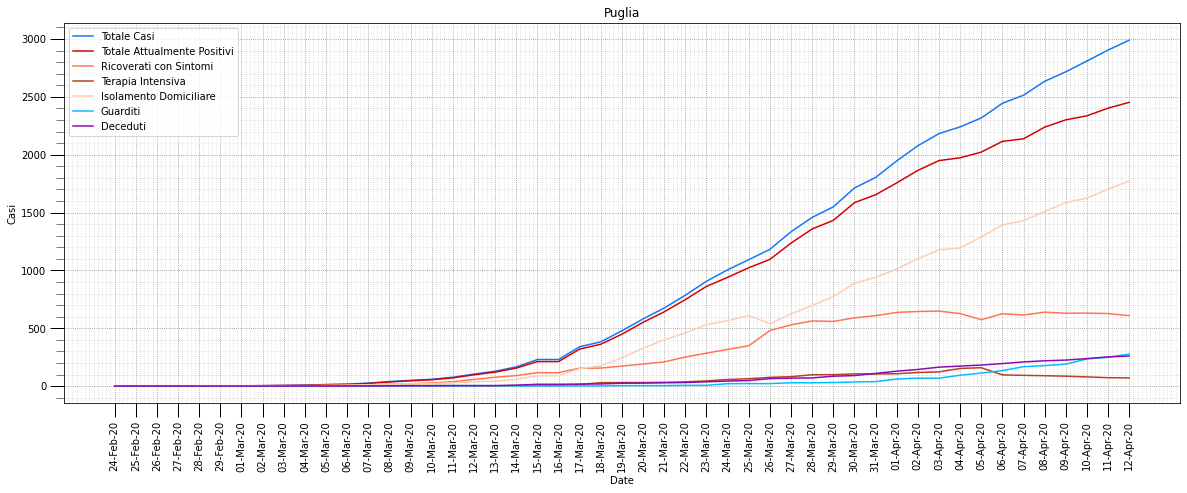

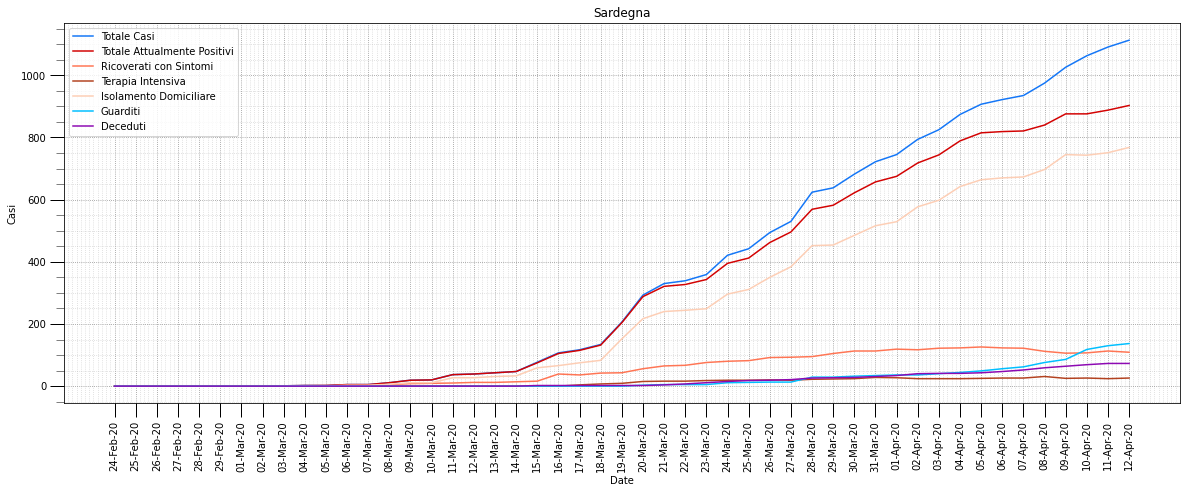

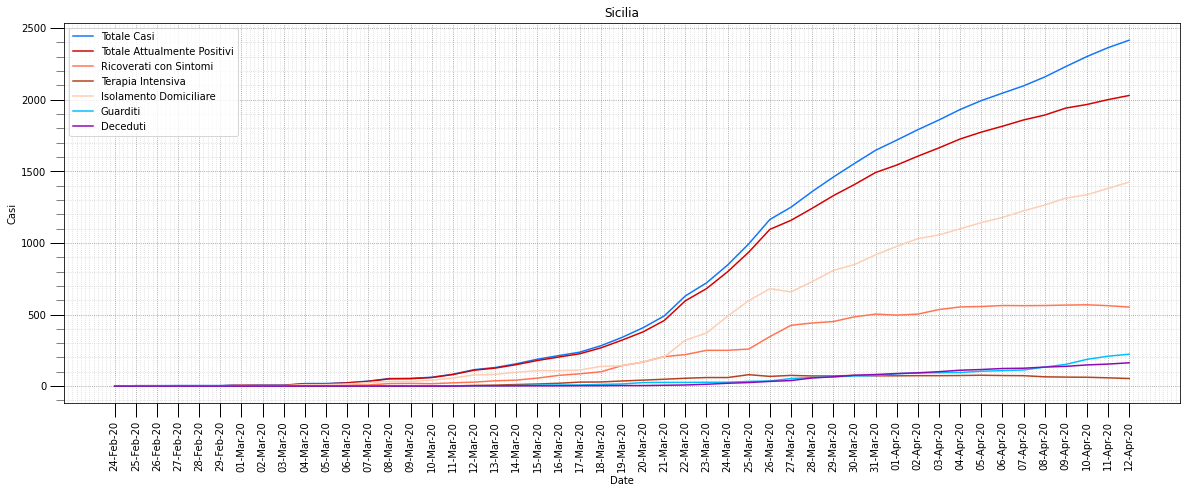

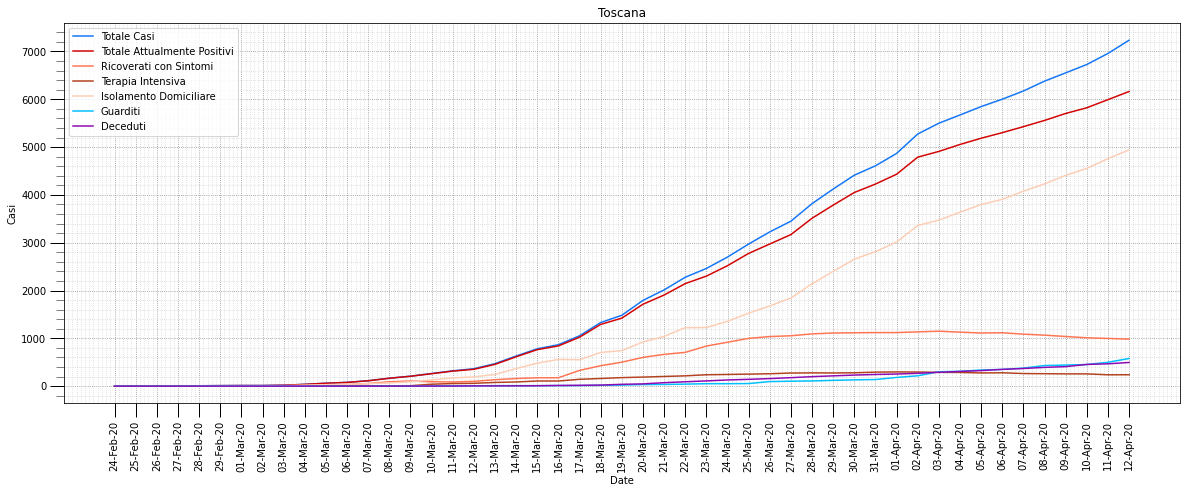

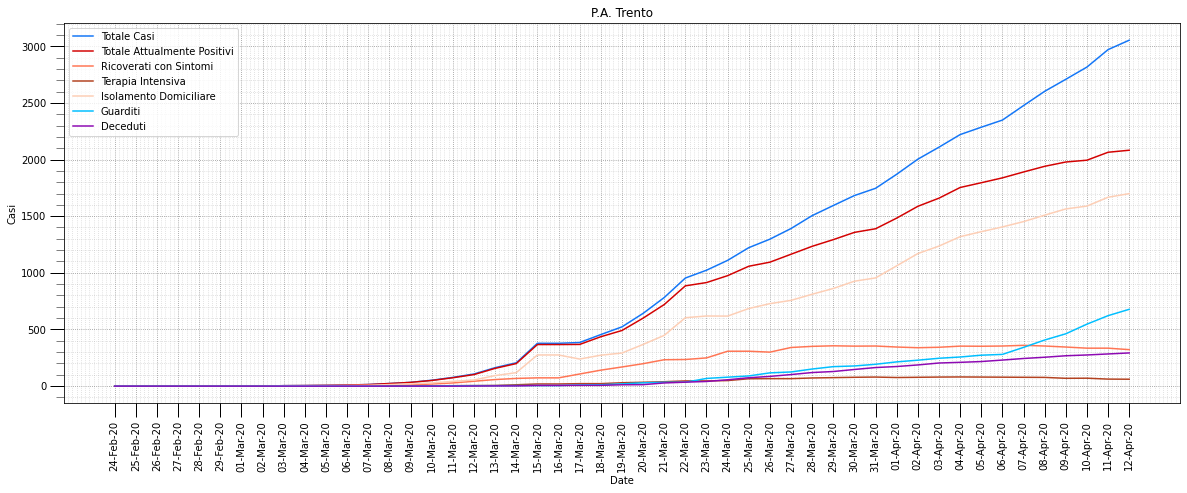

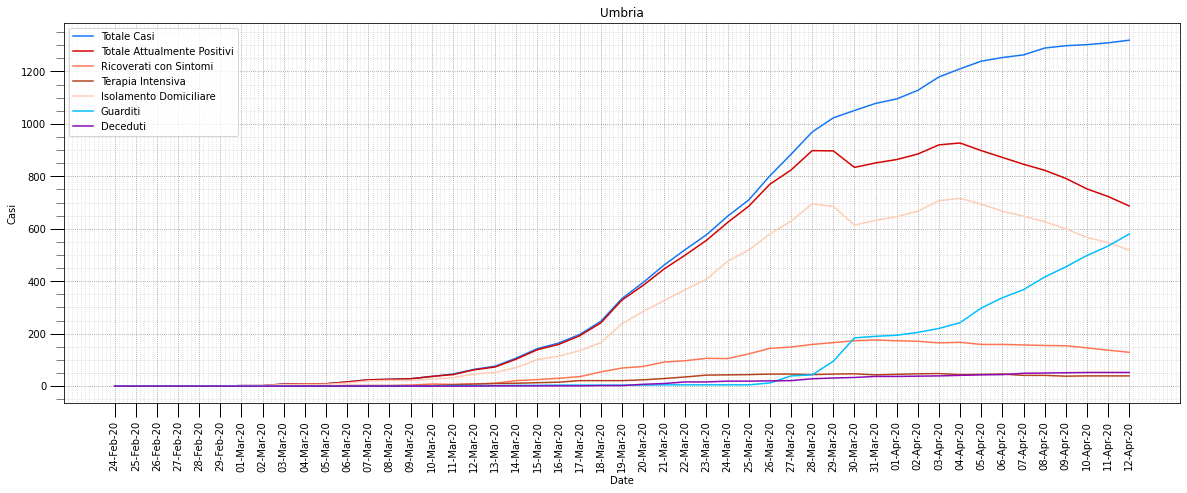

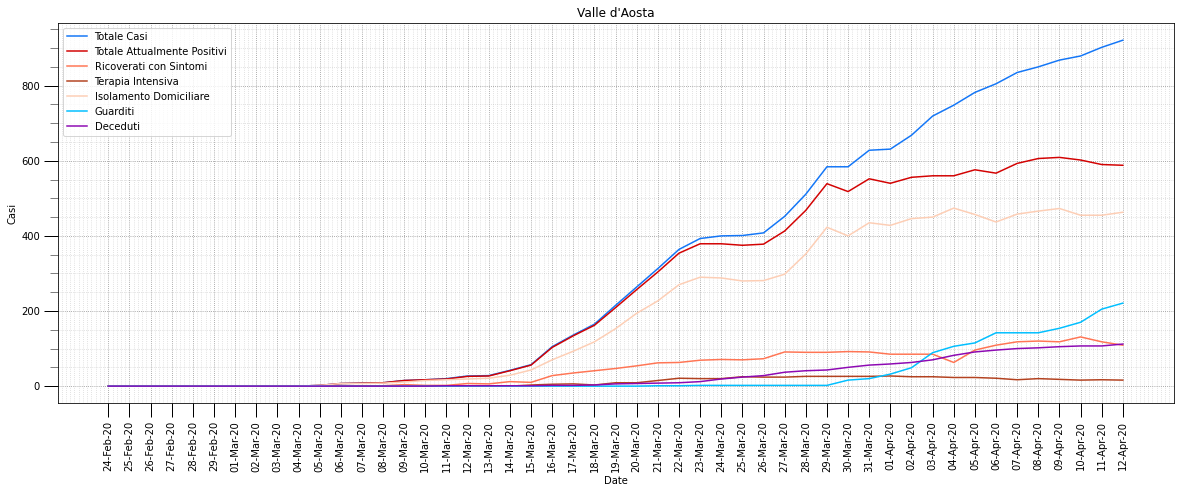

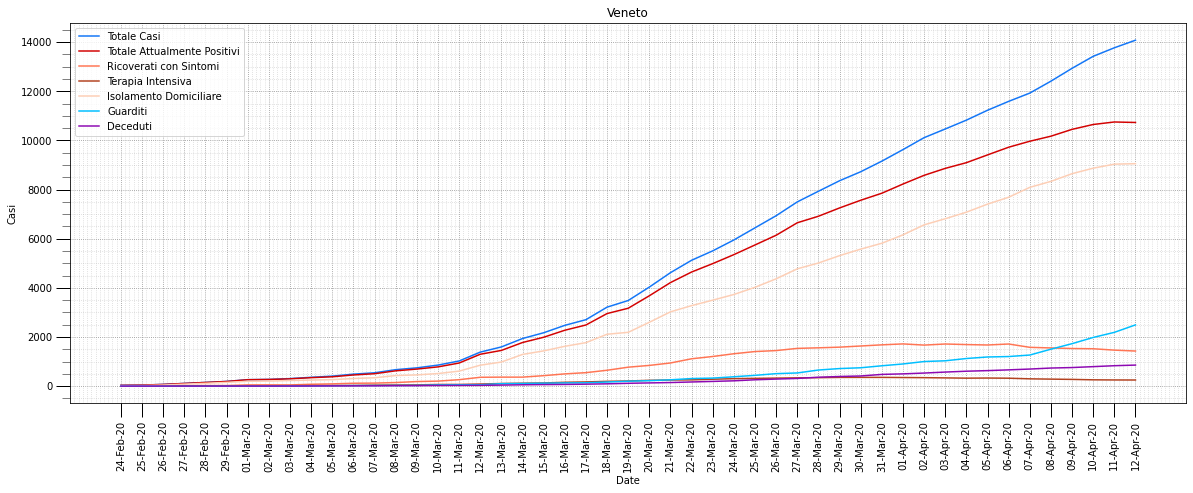

In [240]:

plot =['totale_casi','totale_attualmente_positivi','ricoverati_con_sintomi', 'terapia_intensiva','isolamento_domiciliare','dimessi_guariti','deceduti']
colors = [COL_TOTALE_CASI, COL_ATTUALMENTE_POSITIVI, COL_RICOVERATI, COL_TERAPIA_INTENSIVA, COL_ISOLAMENTO_DOMICILIARE, COL_GUARITI, COL_DECEDUTI]
legends = ["Totale Casi", "Totale Attualmente Positivi","Ricoverati con Sintomi","Terapia Intensiva","Isolamento Domiciliare","Guarditi", "Deceduti"]
for i,r in enumerate(regions[11:]):
    fig, ax = plt.subplots()
    for j,p in enumerate(plot):
        plt.plot(regions_data[r]['data'], regions_data[r][p], color=colors[j], label=legends[j])
    ax.set_title(r)
    ax.set_ylabel('Casi')
    ax.set_xticklabels(regions_data[r]['data'], rotation=90)    
    beautify_graph(ax)